# Machine Learning for Bank Marketing: A Step-by-Step Guide

### Table of Content

1. Introduction
2. Loading the Data
3. Exploratory Data Analysis (EDA)
   - 3.1 Introduction of BankMarketingEDA Class
   - 3.2. Descriptive Analysis
4. Data Cleaning
   - 4.1 Introduction of BankMarketingDataCleanser Class
5. Feature Selection
   - 5.1 Methods of Feature Selection
   - 5.2 Introduction of BankMarketingFeatureSelector Class
   - 5.3 Explanation of Selecting Features
6. Analysis (Model Building and Training)
   - 6.1 Concept and Rationale for Enhanced Classification Tasks
   - 6.2 Brief Introduction of Classes
   - 6.3 Dimensionality Reduction with PCA
   - 6.4 Dimensionality Reduction with SVD
   - 6.5 Dimensionality Reduction with NMF
   - 6.5 Feature Selections
7. Analysis Result
8. Conclusion
9. References

## 1. Introduction

This project involves analyzing and predicting whether a client will subscribe to a term deposit based on various attributes collected from a bank marketing dataset. The dataset includes information such as age, job, marital status, education, balance, and previous marketing campaign outcomes. By applying machine learning techniques, the goal is to build a predictive model that can accurately forecast a client's decision.

**Objective:**
The primary objective of this project is to develop a predictive model that can determine if a client will subscribe to a term deposit. This involves:
- **Data Preprocessing:** Cleaning and preparing the dataset for analysis.
- **Feature Selection and Dimensionality Reduction:** Identifying the most relevant features and reducing the dimensionality to improve model performance.
- **Model Training:** Training various supervised learning models to predict the target variable.
- **Model Evaluation:** Evaluating the models based on their accuracy and other performance metrics to select the best model.

By achieving this objective, the project aims to provide insights into the key factors influencing a client's decision and enhance the bank's marketing strategies.

## 2. Loading the Data

This code block sets up the environment for data analysis by importing essential libraries such as numpy and pandas for numerical and data manipulation tasks, matplotlib.pyplot and seaborn for data visualization, and various utilities from sklearn for machine learning tasks. It then loads a bank marketing dataset from a CSV file into a DataFrame named data_df using pandas. This dataset will be used for further analysis, preprocessing, and modeling in subsequent steps.

In [173]:
# Import necessary libraries
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load Dataset
data_df = pd.read_csv('drive/MyDrive/Colab Notebooks/storage/mscs_ml_bank_marketing/bank.csv')

## 3. Exploratory Data Analysis (EDA)

### 3.1 Introduction of `BankMarketingEDA` Class

The `BankMarketingEDA` class is designed to perform a comprehensive exploratory data analysis (EDA) on a dataset related to bank marketing campaigns. It includes functions to identify unwanted columns, handle missing values, explore categorical and numerical features, and examine the relationships between these features and the target variable, `deposit`. Additionally, the class provides methods to analyze the distribution of continuous features, detect outliers, and assess the correlation between numerical features. This class is essential for gaining insights into the data and preparing it for subsequent modeling and analysis.

**Major Functions of the `BankMarketingEDA` Class**

| Function Name                                         | Description                                                                                   |
|-------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| `__init__`                                            | Initializes the BankMarketingEDA class with the dataset.                                      |
| `find_missing_values`                                 | Finds and prints features with missing values and their proportions.                          |
| `find_features_with_one_value`                        | Identifies and prints features that have only one unique value.                               |
| `explore_categorical_features`                        | Identifies and prints the number of categories for each categorical feature.                  |
| `find_categorical_feature_distribution`               | Plots the distribution of each categorical feature.                                           |
| `explore_numerical_features`                          | Identifies and prints numerical features in the dataset.                                      |
| `find_discrete_numerical_features`                    | Identifies and prints discrete numerical features with fewer than 25 unique values.           |
| `find_continuous_numerical_features`                  | Identifies and prints continuous numerical features.                                          |
| `find_outliers_in_numerical_features`                 | Detects and plots outliers in numerical features.                                             |
| `check_dataset_balance`                               | Checks and plots the balance of the dataset based on the target variable, `deposit`.          |
| `relationship_between_categorical_features_and_label` | Examines and plots the relationship between categorical features and the target variable.     |
| `relation_between_discrete_numerical_features_and_labels` | Examines the relationship between discrete numerical features and the target variable.        |
| `relation_between_continuous_numerical_features_and_labels` | Examines and plots the relationship between continuous numerical features and the target variable.|
| `distribution_of_continuous_numerical_features`       | Plots the distribution of each continuous numerical feature.                                  |
| `explore_correlation_between_numerical_features`      | Plots the correlation matrix of numerical features.                                           |


In [174]:
class BankMarketingEDA:
    """
    A class to perform Exploratory Data Analysis (EDA) on a bank marketing dataset.
    The class includes methods to identify missing values, explore categorical and numerical features,
    analyze relationships between features and the target variable, detect outliers, and check dataset balance.
    """

    def __init__(self, df):
        """
        Initializes the BankMarketingEDA class with the dataset.

        Parameters:
        df (pd.DataFrame): The dataset to be analyzed.
        """
        self.df = df

    def find_missing_values(self):
        """
        Finds and prints features with missing values and their proportions.
        """
        print("\nFinding Missing Values:")
        features_na = [feature for feature in self.df.columns if self.df[feature].isnull().sum() > 0]
        if features_na:
            for feature in features_na:
                print(f"{feature}: {np.round(self.df[feature].isnull().mean(), 4)}% missing values")
        else:
            print("No missing value found")

    def find_features_with_one_value(self):
        """
        Identifies and prints features that have only one unique value.
        """
        print("\nFinding Features with One Value:")
        features_one = [feature for feature in self.df.columns if self.df[feature].nunique() == 1]
        if features_one:
            print("Features with only one unique value: ", features_one)
        else:
            print("No feature with only one value")

    def explore_categorical_features(self):
        """
        Identifies and prints the number of categories for each categorical feature.

        Returns:
        list: A list of categorical features excluding the target variable.
        """
        print("\nExploring Categorical Features:")
        features_cate = [feature for feature in self.df.columns if self.df[feature].dtype == 'O' and feature != 'deposit']
        for feature in features_cate:
            print(f"The feature is {feature} and the number of categories are {len(self.df[feature].unique())}")
        return features_cate

    def find_categorical_feature_distribution(self, categorical_features):
        """
        Plots the distribution of each categorical feature.

        Parameters:
        categorical_features (list): A list of categorical features.
        """
        print("\nFinding Categorical Feature Distribution:")
        plt.figure(figsize=(15, 80), facecolor='white')
        plotnumber = 1
        for categorical_feature in categorical_features:
            ax = plt.subplot(12, 3, plotnumber)
            sns.countplot(y=categorical_feature, data=self.df)
            plt.xlabel(categorical_feature)
            plt.title(categorical_feature)
            plotnumber += 1
        plt.show()

    def explore_numerical_features(self):
        """
        Identifies and prints numerical features in the dataset.

        Returns:
        list: A list of numerical features excluding the target variable.
        """
        print("\nExploring Numerical Features:")
        numerical_features = [feature for feature in self.df.columns if self.df[feature].dtype != 'O' and feature != 'deposit']
        print(f"Number of numerical variables: {len(numerical_features)}")
        print(self.df[numerical_features].head())
        return numerical_features

    def find_discrete_numerical_features(self, numerical_features):
        """
        Identifies and prints discrete numerical features with fewer than 25 unique values.

        Parameters:
        numerical_features (list): A list of numerical features.

        Returns:
        list: A list of discrete numerical features.
        """
        print("\nFinding Discrete Numerical Features:")
        discrete_features = [feature for feature in numerical_features if len(self.df[feature].unique()) < 25]
        print(f"Discrete Variables Count: {len(discrete_features)}")
        return discrete_features

    def find_continuous_numerical_features(self, numerical_features, discrete_features):
        """
        Identifies and prints continuous numerical features.

        Parameters:
        numerical_features (list): A list of numerical features.
        discrete_features (list): A list of discrete numerical features.

        Returns:
        list: A list of continuous numerical features.
        """
        print("\nFinding Continuous Numerical Features:")
        continuous_features = [feature for feature in numerical_features if feature not in discrete_features + ['deposit']]
        print(f"Continuous feature Count: {len(continuous_features)}")
        return continuous_features

    def find_outliers_in_numerical_features(self, numerical_features):
        """
        Detects and plots outliers in numerical features.

        Parameters:
        numerical_features (list): A list of numerical features.
        """
        print("\nFinding Outliers in Numerical Features:")
        plt.figure(figsize=(20, 60), facecolor='white')
        plotnumber = 1
        for numerical_feature in numerical_features:
            ax = plt.subplot(12, 3, plotnumber)
            sns.boxplot(self.df[numerical_feature])
            plt.xlabel(numerical_feature)
            plotnumber += 1
        plt.show()

    def check_dataset_balance(self):
        """
        Checks and plots the balance of the dataset based on the target variable, 'deposit'.
        """
        print("\nChecking Dataset Balance:")
        print(self.df['deposit'].groupby(self.df['deposit']).count())
        sns.countplot(x='deposit', data=self.df)
        plt.show()

    def relationship_between_categorical_features_and_label(self, categorical_features):
        """
        Examines and plots the relationship between categorical features and the target variable.

        Parameters:
        categorical_features (list): A list of categorical features.
        """
        print("\nRelationship Between Categorical Features and Label:")
        for categorical_feature in categorical_features:
            sns.catplot(x='deposit', col=categorical_feature, kind='count', data=self.df)
        plt.show()

        for categorical_feature in categorical_features:
            print(self.df.groupby(['deposit', categorical_feature]).size())

    def relation_between_discrete_numerical_features_and_labels(self, discrete_features):
        """
        Examines the relationship between discrete numerical features and the target variable.

        Parameters:
        discrete_features (list): A list of discrete numerical features.
        """
        print("\nRelation Between Discrete Numerical Features and Labels:")
        # No discrete features found
        pass

    def relation_between_continuous_numerical_features_and_labels(self, continuous_features):
        """
        Examines and plots the relationship between continuous numerical features and the target variable.

        Parameters:
        continuous_features (list): A list of continuous numerical features.
        """
        print("\nRelation Between Continuous Numerical Features and Labels:")
        plt.figure(figsize=(20, 60), facecolor='white')
        plotnumber = 1
        for feature in continuous_features:
            ax = plt.subplot(12, 3, plotnumber)
            sns.boxplot(x="deposit", y=self.df[feature], data=self.df)
            plt.xlabel(feature)
            plotnumber += 1
        plt.show()

    def distribution_of_continuous_numerical_features(self, continuous_features):
        """
        Plots the distribution of each continuous numerical feature.

        Parameters:
        continuous_features (list): A list of continuous numerical features.
        """
        print("\nDistribution of Continuous Numerical Features:")
        plt.figure(figsize=(20, 60), facecolor='white')
        plotnumber = 1
        for continuous_feature in continuous_features:
            ax = plt.subplot(12, 3, plotnumber)
            sns.histplot(self.df[continuous_feature], kde=True)
            plt.xlabel(continuous_feature)
            plotnumber += 1
        plt.show()

    def explore_correlation_between_numerical_features(self):
        """
        Plots the correlation matrix of numerical features.
        """
        print("\nExploring Correlation Between Numerical Features:")
        numerical_features = [feature for feature in self.df.columns if self.df[feature].dtype != 'O']
        cor_mat = self.df[numerical_features].corr()
        plt.figure(figsize=(15, 7))
        sns.heatmap(cor_mat, annot=True)
        plt.show()


### 3.2. Descriptive Analysis

This block of code creates an instance of the BankMarketingEDA class using the dataset data_df and performs several exploratory data analysis (EDA) steps. It identifies missing values and features with a single unique value, explores categorical features, plots their distributions, and examines the relationship between categorical features and the target variable, deposit.


Finding Missing Values:
No missing value found

Finding Features with One Value:
No feature with only one value

Exploring Categorical Features:
The feature is job and the number of categories are 12
The feature is marital and the number of categories are 3
The feature is education and the number of categories are 4
The feature is default and the number of categories are 2
The feature is housing and the number of categories are 2
The feature is loan and the number of categories are 2
The feature is contact and the number of categories are 3
The feature is month and the number of categories are 12
The feature is poutcome and the number of categories are 4

Finding Categorical Feature Distribution:


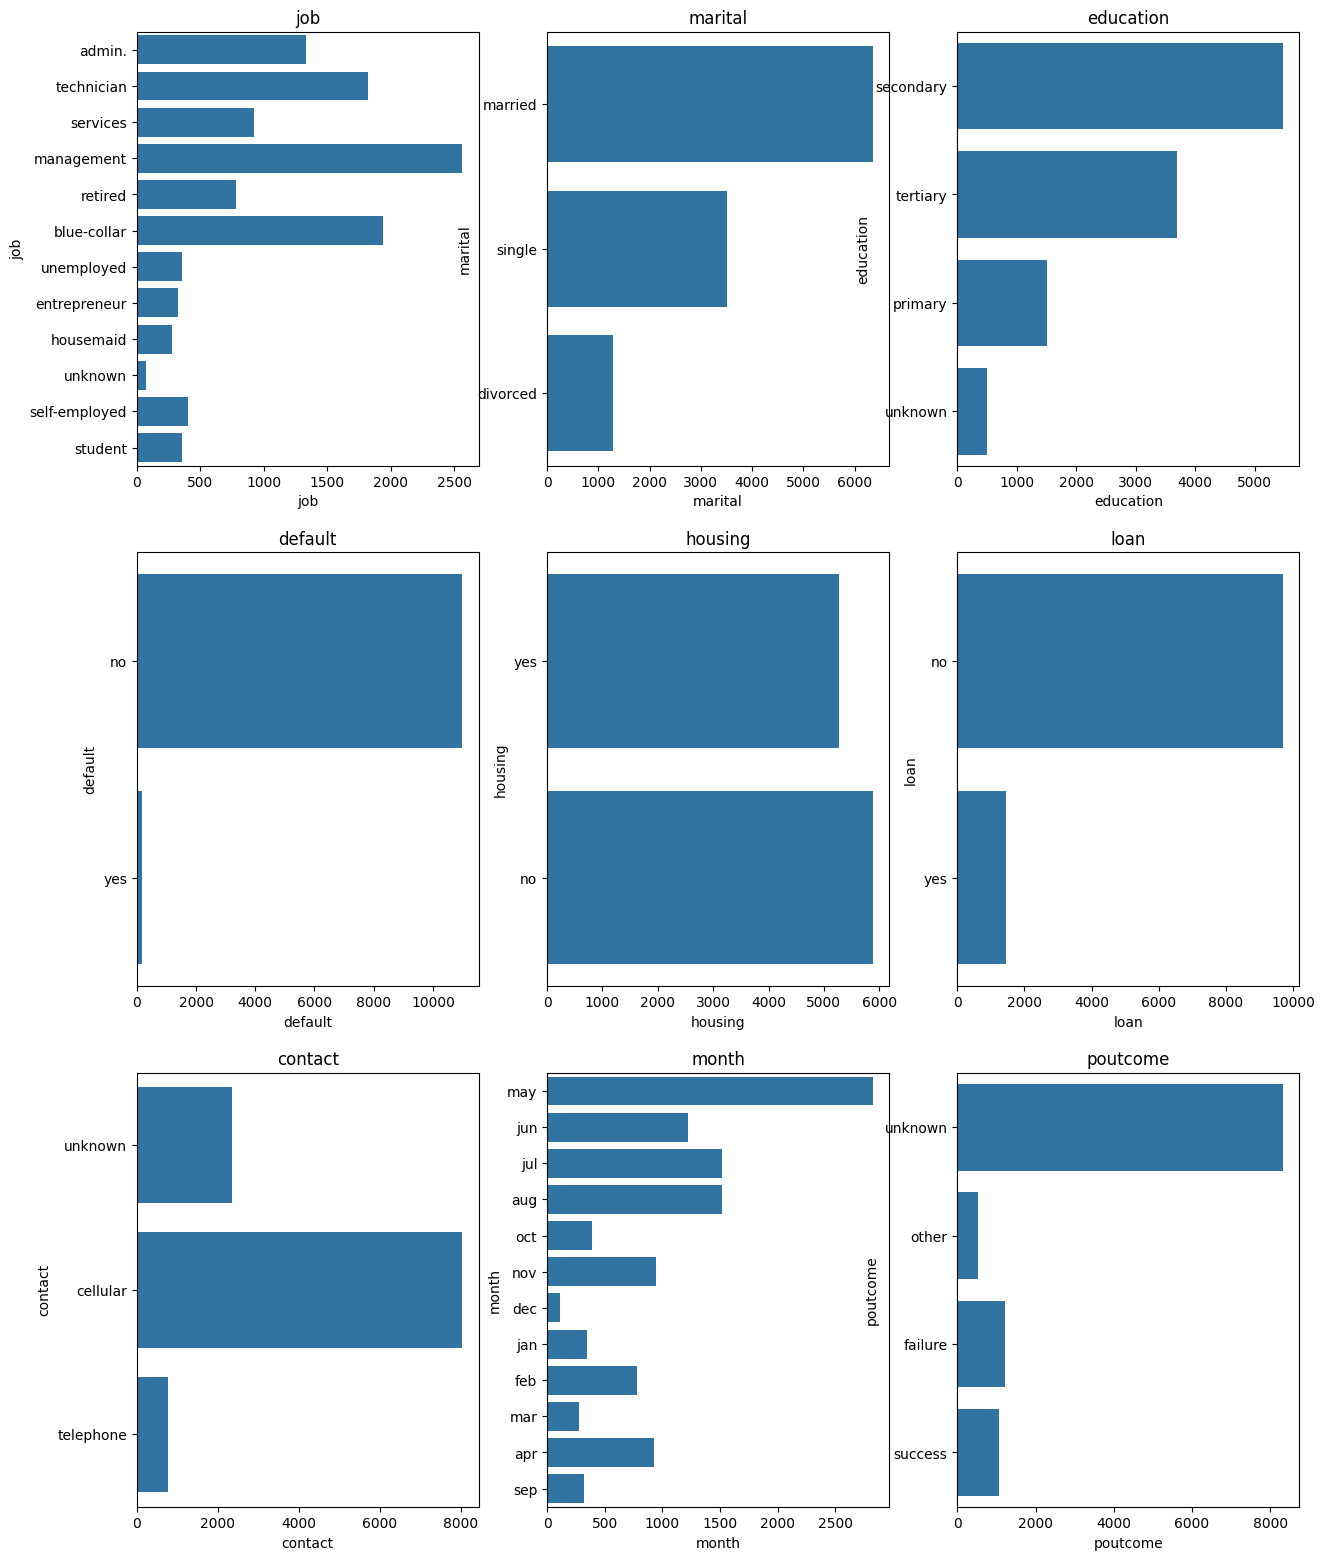


Relationship Between Categorical Features and Label:


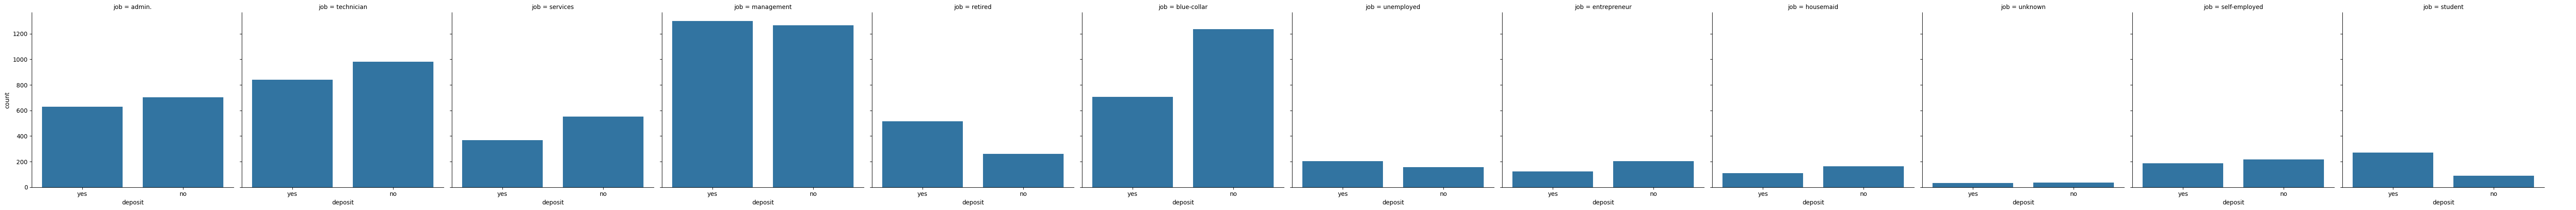

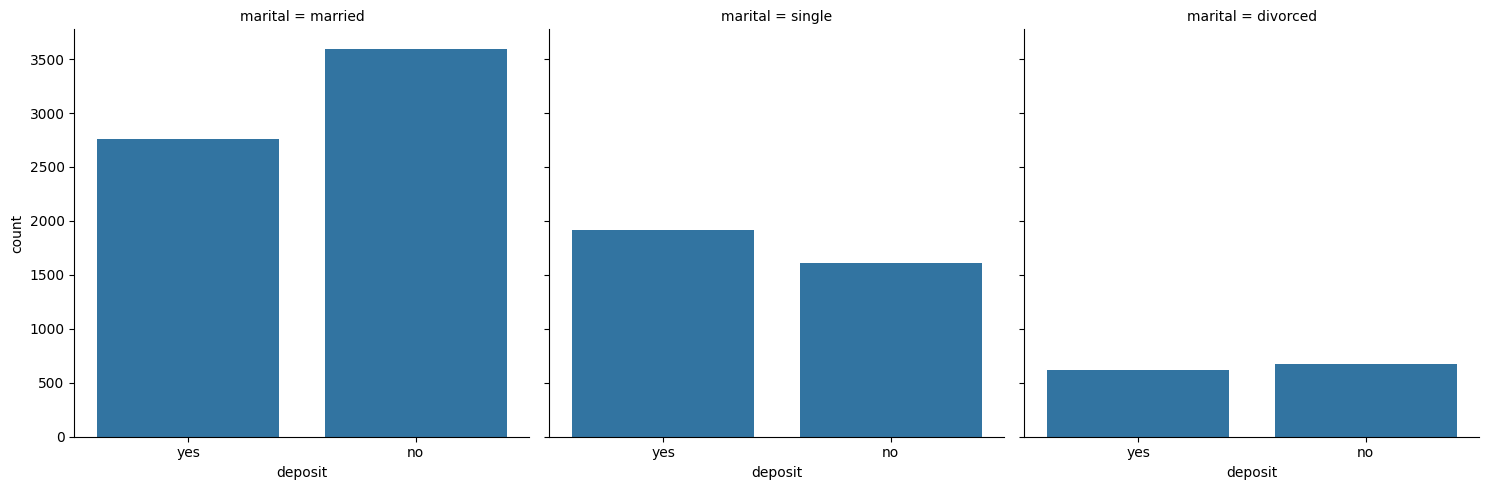

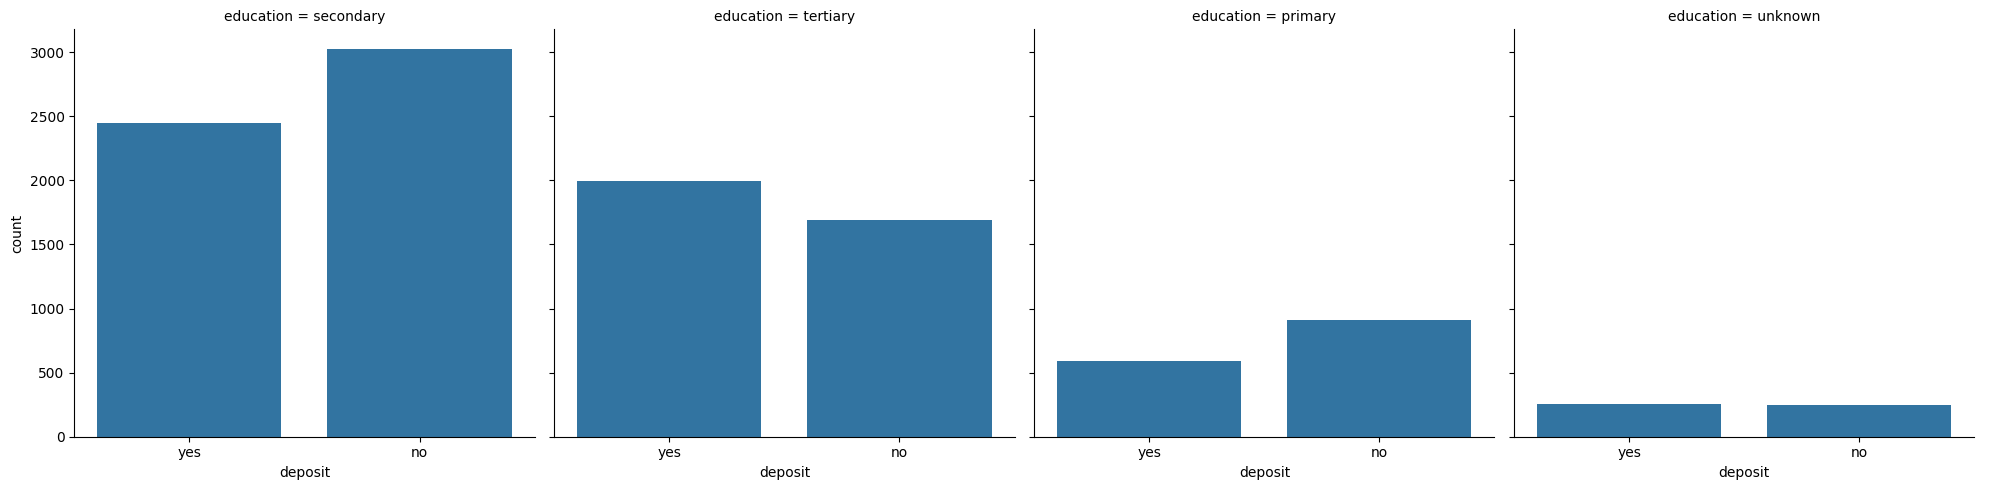

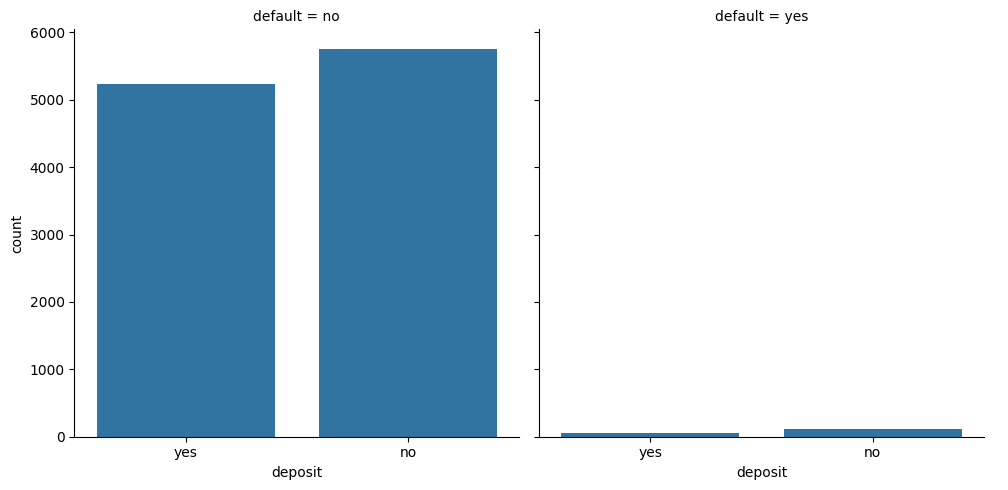

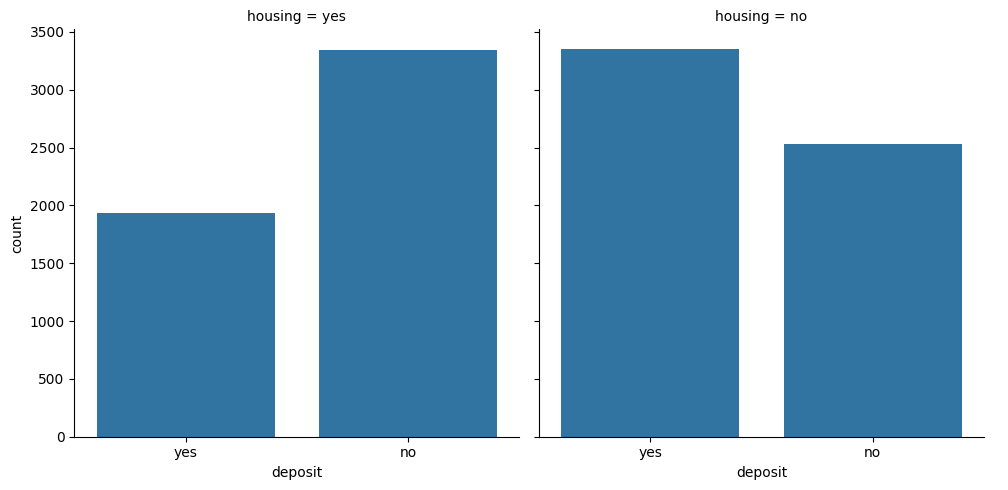

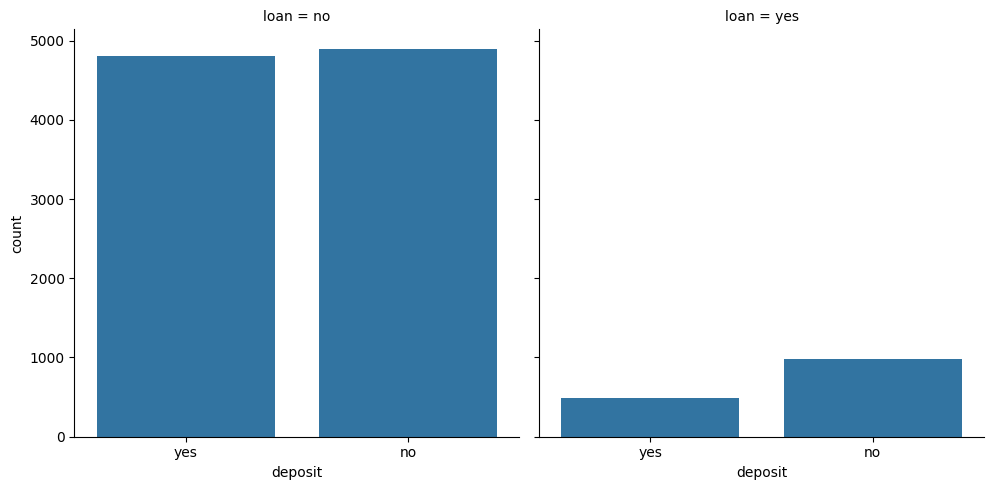

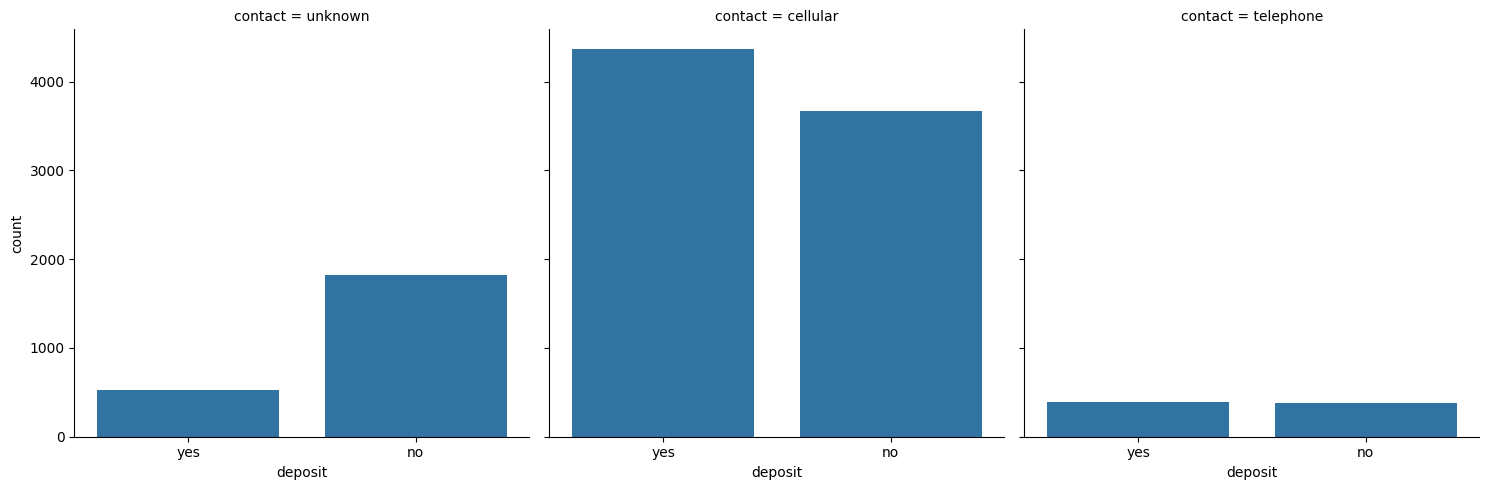

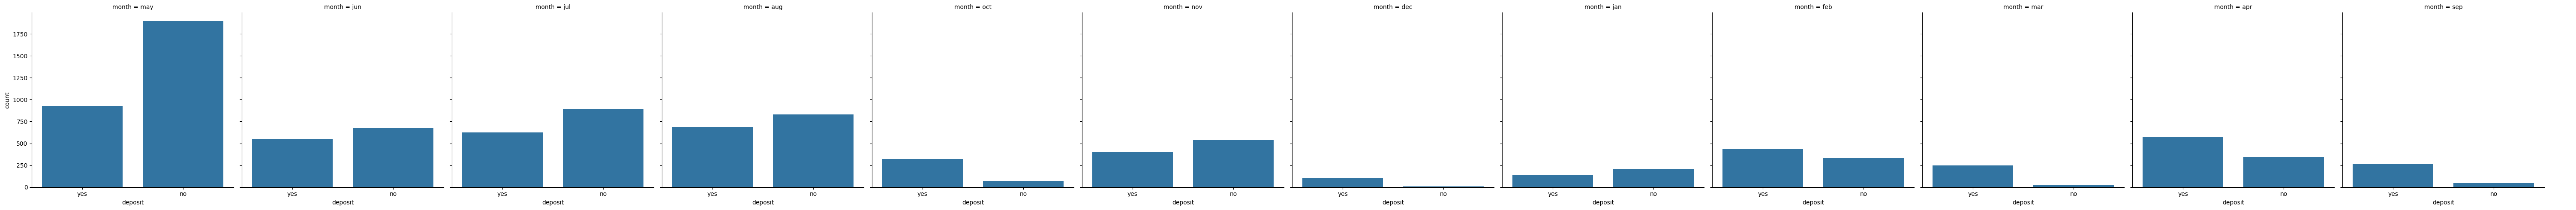

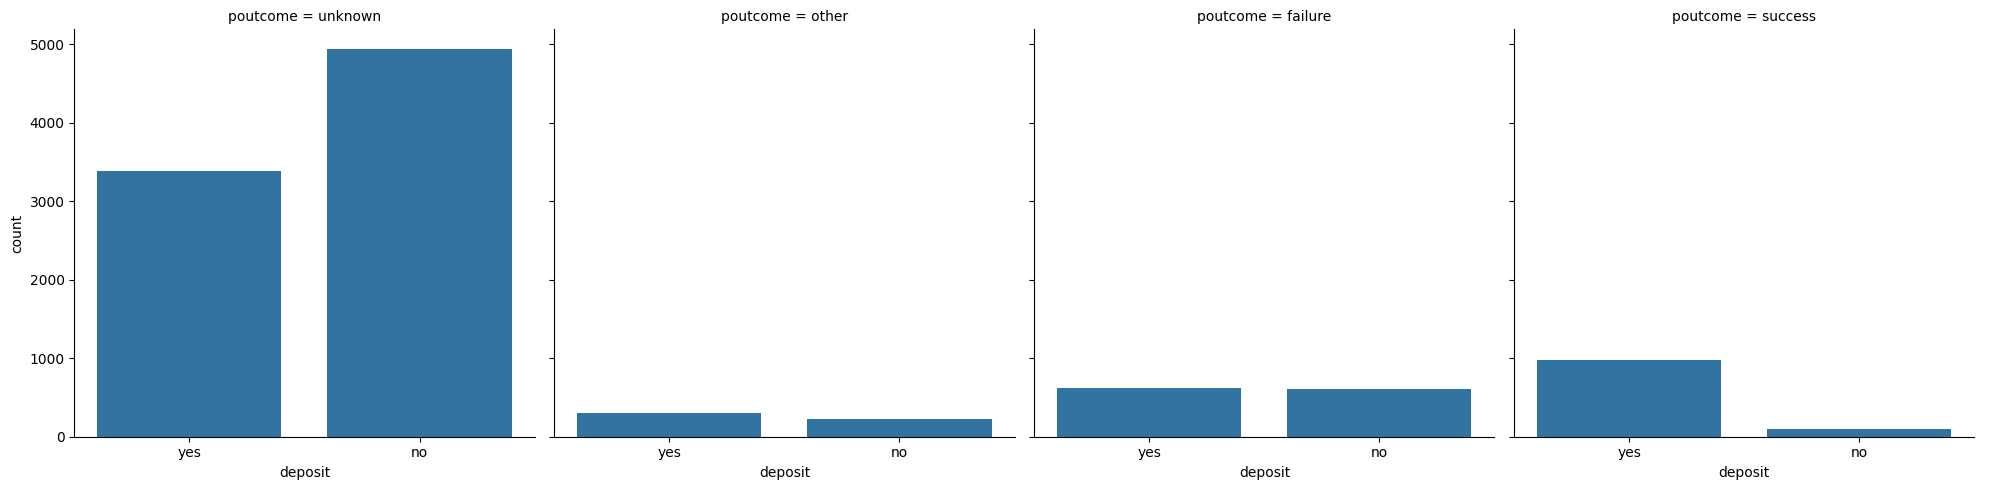

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

In [175]:
# Instantiate the BankMarketingEDA class with the dataset
eda = BankMarketingEDA(data_df)

# Find and print features with missing values and their proportions
eda.find_missing_values()

# Identify and print features that have only one unique value
eda.find_features_with_one_value()

# Explore and print the number of categories for each categorical feature (excluding the target variable)
categorical_features = eda.explore_categorical_features()

# Plot the distribution of each categorical feature
eda.find_categorical_feature_distribution(categorical_features)

# Examine and plot the relationship between categorical features and the target variable 'deposit'
eda.relationship_between_categorical_features_and_label(categorical_features)

This block of code further explores the numerical features of the dataset. It identifies numerical, discrete, and continuous features, examines the relationship between these features and the target variable, detects outliers in numerical features, and analyzes the distribution of continuous features.


Exploring Numerical Features:
Number of numerical variables: 7
   age  balance  day  duration  campaign  pdays  previous
0   59     2343    5      1042         1     -1         0
1   56       45    5      1467         1     -1         0
2   41     1270    5      1389         1     -1         0
3   55     2476    5       579         1     -1         0
4   54      184    5       673         2     -1         0

Finding Discrete Numerical Features:
Discrete Variables Count: 0

Finding Continuous Numerical Features:
Continuous feature Count: 7

Relation Between Discrete Numerical Features and Labels:

Finding Outliers in Numerical Features:


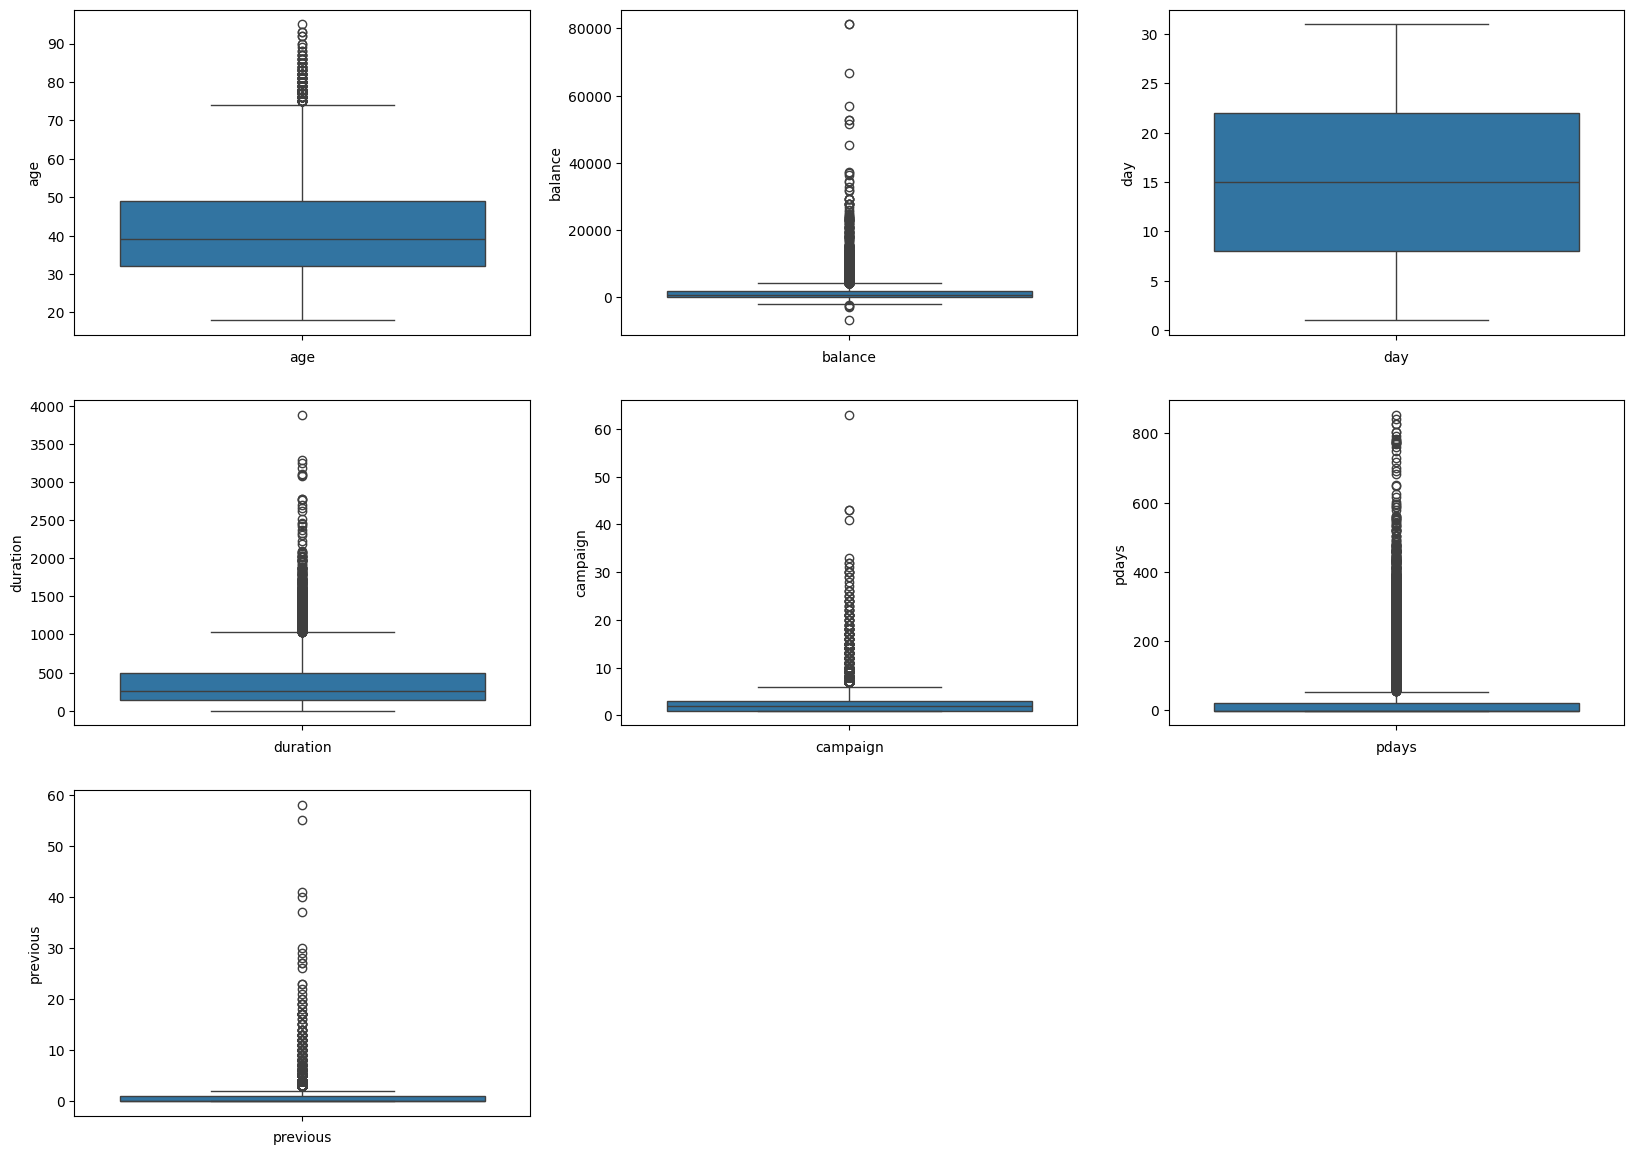


Relation Between Continuous Numerical Features and Labels:


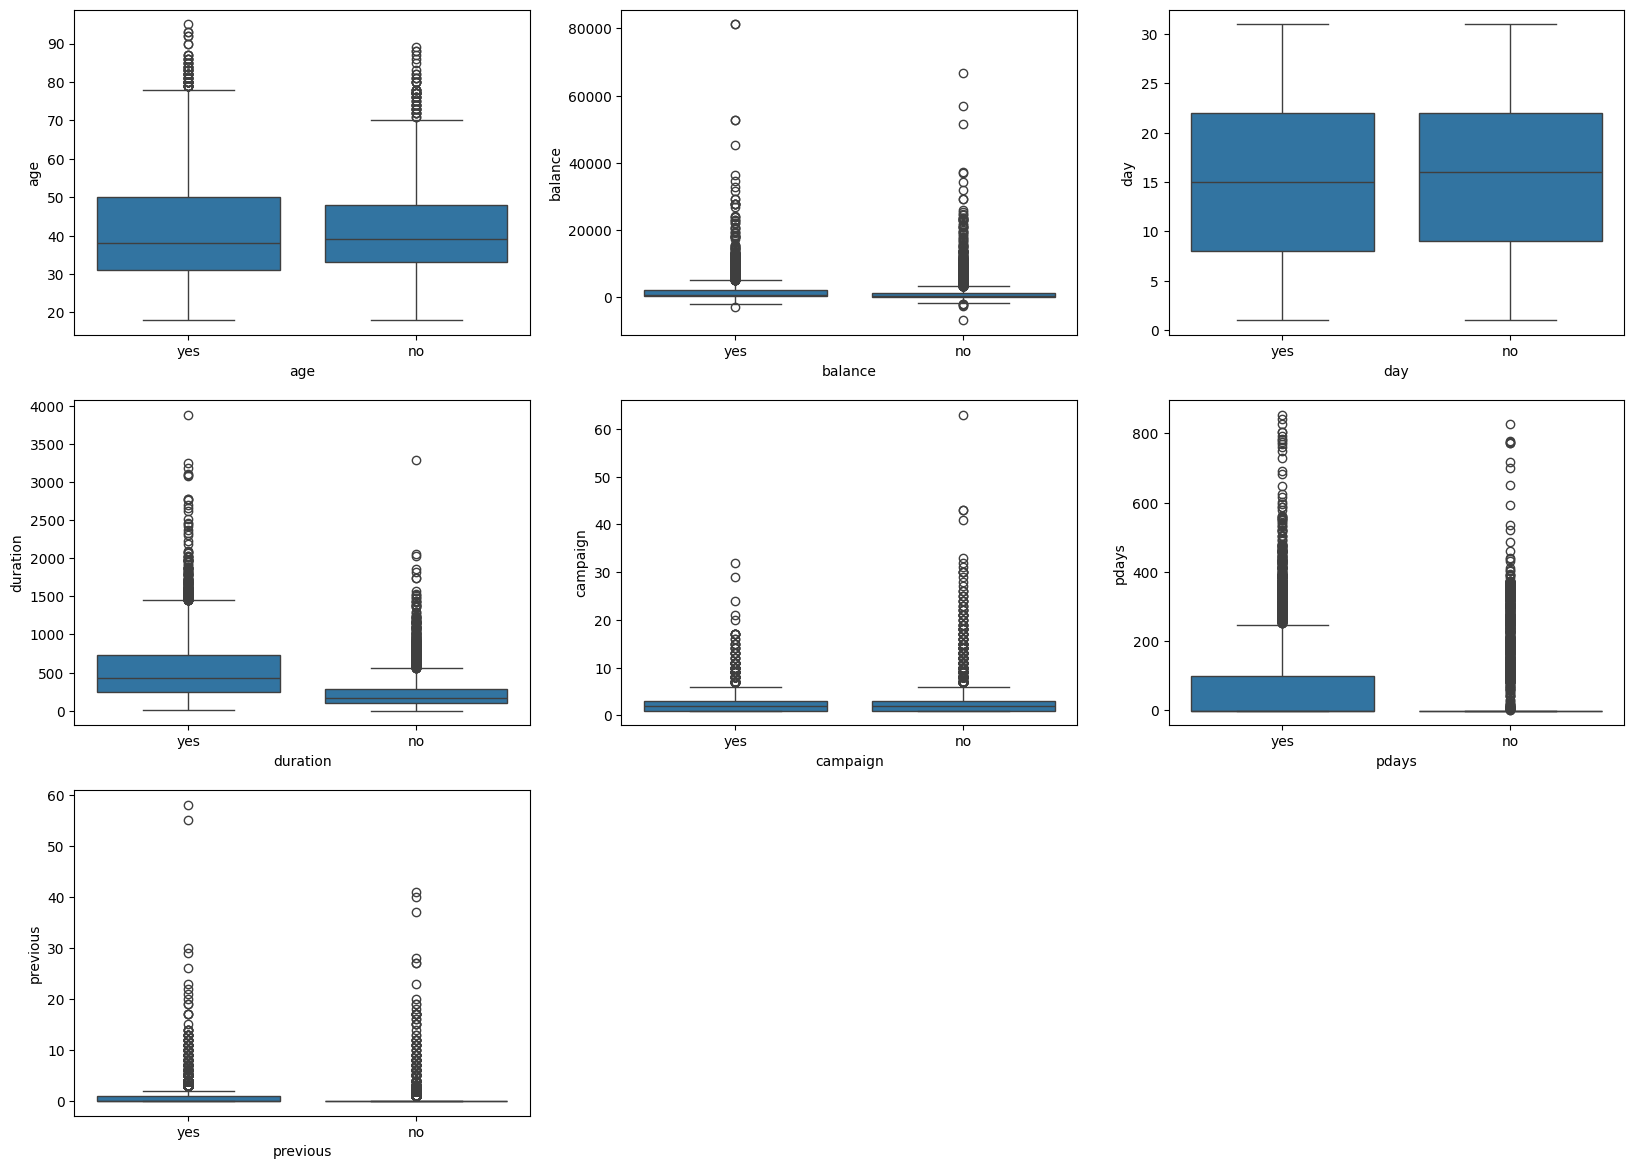


Distribution of Continuous Numerical Features:


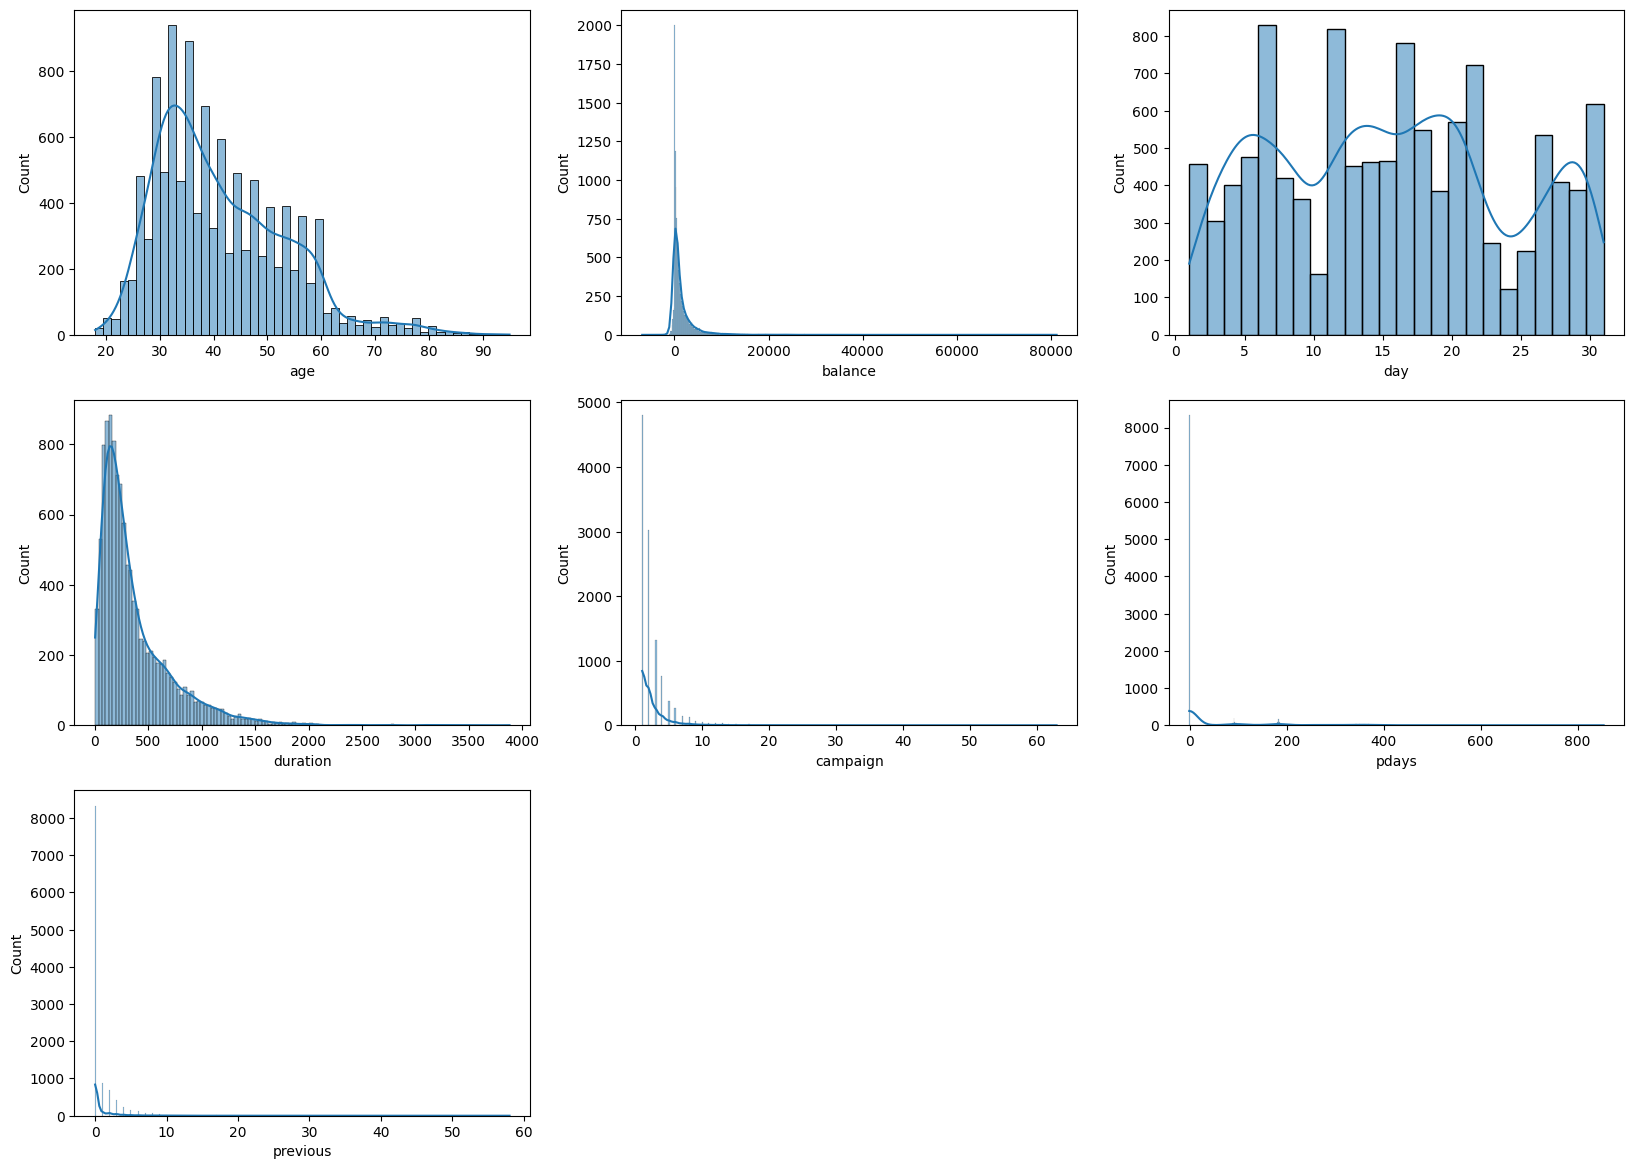

In [176]:
# Explore and print the numerical features in the dataset (excluding the target variable)
numerical_features = eda.explore_numerical_features()

# Identify and print discrete numerical features with fewer than 25 unique values
discrete_features = eda.find_discrete_numerical_features(numerical_features)

# Identify and print continuous numerical features
continuous_features = eda.find_continuous_numerical_features(numerical_features, discrete_features)

# Examine the relationship between discrete numerical features and the target variable 'deposit'
eda.relation_between_discrete_numerical_features_and_labels(discrete_features)

# Detect and plot outliers in numerical features
eda.find_outliers_in_numerical_features(numerical_features)

# Examine and plot the relationship between continuous numerical features and the target variable 'deposit'
eda.relation_between_continuous_numerical_features_and_labels(continuous_features)

# Plot the distribution of each continuous numerical feature
eda.distribution_of_continuous_numerical_features(continuous_features)

Here are two final steps in the exploratory data analysis (EDA) process: it explores the correlation between numerical features in the dataset and checks the balance of the dataset based on the target variable, deposit.


Exploring Correlation Between Numerical Features:


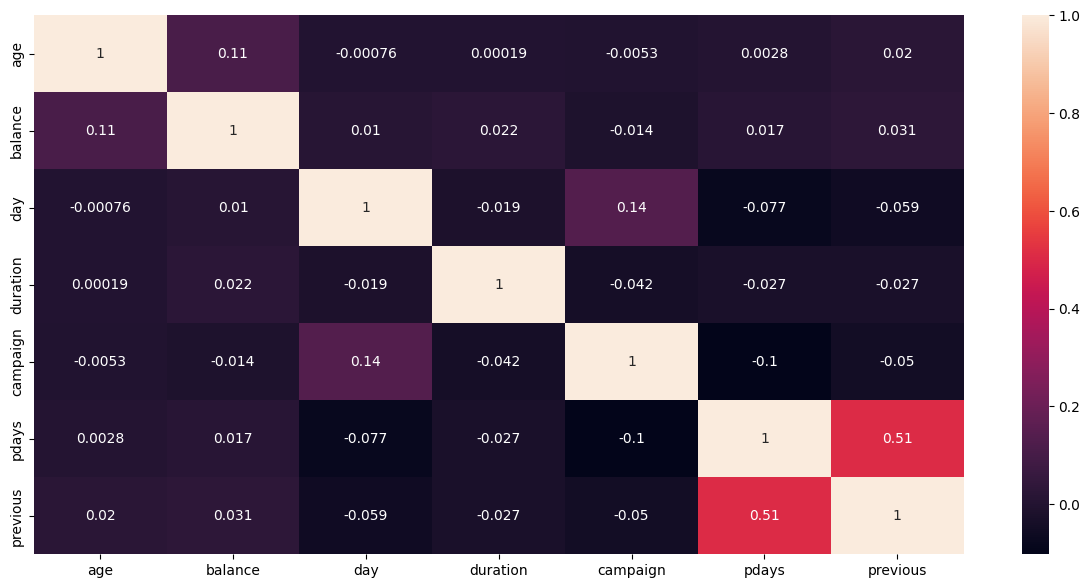


Checking Dataset Balance:
deposit
no     5873
yes    5289
Name: deposit, dtype: int64


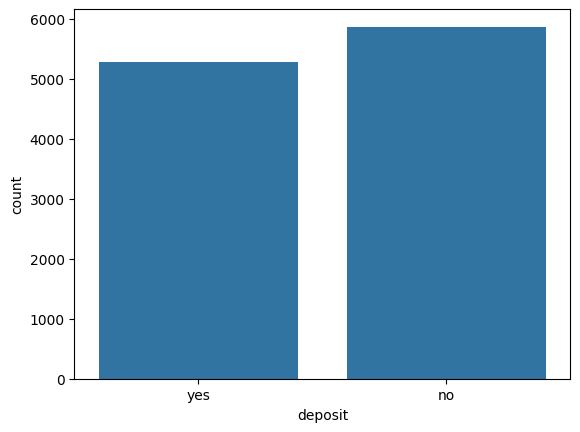

In [177]:
# Explore the correlation matrix of numerical features and visualize it using a heatmap
eda.explore_correlation_between_numerical_features()

# Check and visualize the balance of the dataset based on the target variable 'deposit'
eda.check_dataset_balance()

## 4. Data Cleaning

### 4.1 Introduction of `BankMarketingDataCleanser` Class

The `BankMarketingDataCleanser` class is designed to facilitate the cleaning and preprocessing of a bank marketing dataset. This class includes a set of methods to systematically handle common data preparation tasks, such as dealing with missing values, converting categorical variables into numerical format, normalizing numerical features, identifying and removing outliers, addressing imbalanced data, and eliminating unnecessary features. By encapsulating these steps within a class, the `BankMarketingDataCleanser` provides a structured and reusable approach to prepare the dataset for further analysis or model training.

In [178]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

class BankMarketingDataCleanser:
    """
    A class to perform data cleaning and preprocessing on a bank marketing dataset.
    The class includes methods to handle missing values, convert categorical variables,
    normalize numerical features, remove outliers, handle imbalanced data, and drop unnecessary features.
    """

    def __init__(self, df):
        """
        Initializes the BankMarketingDataCleanser class with the dataset.

        Parameters:
        df (pd.DataFrame): The dataset to be cleaned and preprocessed.
        """
        self.df = df

    def handle_missing_values(self):
        """
        Handles missing values in the dataset.
        Categorical features are filled with the mode, and numerical features are filled with the median.
        """
        print("\nHandle Missing Values:")

        # Find columns with missing values
        features_na = [feature for feature in self.df.columns if self.df[feature].isnull().sum() > 0]

        # Print the missing values information
        if features_na:
            for feature in features_na:
                print(f"{feature}: {np.round(self.df[feature].isnull().mean() * 100, 2)}% missing values")
        else:
            print("No missing values found")

        # Handle missing values
        for feature in features_na:
            if self.df[feature].dtype == 'O':  # Categorical feature
                # Fill missing values with the mode (most frequent value)
                self.df[feature].fillna(self.df[feature].mode()[0], inplace=True)
            else:  # Numerical feature
                # Fill missing values with the median
                self.df[feature].fillna(self.df[feature].median(), inplace=True)

        print("Missing values handled")

    def convert_categorical_to_numerical(self):
        """
        Converts categorical variables to numerical using one-hot encoding.
        The target variable 'deposit' is excluded from the conversion.
        """
        print("\nConvert Categorical Variables to Numerical:")

        # Identify categorical features
        categorical_features = self.df.select_dtypes(include=['object']).columns.tolist()

        # Exclude the target variable if it's categorical
        if 'deposit' in categorical_features:
            categorical_features.remove('deposit')

        # Use one-hot encoding for categorical features
        self.df = pd.get_dummies(self.df, columns=categorical_features, drop_first=True)
        print("Categorical variables converted")

    def normalize_numerical_features(self):
        """
        Normalizes numerical features using StandardScaler.
        The target variable 'deposit' is excluded from normalization.
        """
        print("\nNormalize or Standardize Numerical Features:")

        # Identify numerical features
        numerical_features = self.df.select_dtypes(include=['int64', 'float64']).columns.tolist()

        # Exclude the target variable if it's numerical
        if 'deposit' in numerical_features:
            numerical_features.remove('deposit')

        # Normalize numerical features
        scaler = StandardScaler()
        self.df[numerical_features] = scaler.fit_transform(self.df[numerical_features])
        print("Numerical features normalized")

    def remove_outliers(self):
        """
        Removes outliers from numerical features using the IQR method.
        The target variable 'deposit' is excluded from outlier removal.
        """
        print("\nRemove or Treat Outliers:")

        # Identify numerical features
        numerical_features = self.df.select_dtypes(include=['int64', 'float64']).columns.tolist()

        # Exclude the target variable if it's numerical
        if 'deposit' in numerical_features:
            numerical_features.remove('deposit')

        # Removing outliers using IQR method
        Q1 = self.df[numerical_features].quantile(0.25)
        Q3 = self.df[numerical_features].quantile(0.75)
        IQR = Q3 - Q1
        self.df = self.df[~((self.df[numerical_features] < (Q1 - 1.5 * IQR)) | (self.df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
        print("Outliers removed")

    def handle_imbalanced_data(self):
        """
        Handles imbalanced data by oversampling the minority class using SMOTE.
        """
        print("\nHandle Imbalanced Data:")

        # Separate features and target variable
        X = self.df.drop('deposit', axis=1)
        y = self.df['deposit']

        # Apply SMOTE to handle imbalanced data
        smote = SMOTE(sampling_strategy='minority')
        X_res, y_res = smote.fit_resample(X, y)

        # Combine the resampled features and target variable
        self.df = pd.concat([X_res, y_res], axis=1)
        print("Imbalanced data handled")

    def drop_unnecessary_features(self):
        """
        Drops unnecessary features from the dataset.
        For this dataset, the 'duration' feature is dropped.
        """
        print("\nDrop Unnecessary Features:")
        self.df = self.df.drop(['duration'], axis=1)
        print("Unnecessary features dropped")

    def get_cleaned_data(self):
        """
        Returns the cleaned and preprocessed dataset.

        Returns:
        pd.DataFrame: The cleaned dataset.
        """
        return self.df


This block of code demonstrates the usage of the BankMarketingDataCleanser class to clean and preprocess the data_df dataset. It handles missing values, converts categorical variables to numerical, normalizes numerical features, removes outliers, handles imbalanced data, and drops unnecessary features, resulting in a cleaned dataset cleaned_df.

In [179]:
print(data_df.describe())

# Instantiate the BankMarketingDataCleanser class with the dataset
cleanser = BankMarketingDataCleanser(data_df)

# Handle missing values in the dataset
cleanser.handle_missing_values()

# Convert categorical variables to numerical using one-hot encoding
cleanser.convert_categorical_to_numerical()

# Normalize numerical features using StandardScaler
cleanser.normalize_numerical_features()

# Remove outliers from numerical features using the IQR method
cleanser.remove_outliers()

# Handle imbalanced data by oversampling the minority class using SMOTE
cleanser.handle_imbalanced_data()

# Drop unnecessary features from the dataset (e.g., 'duration')
cleanser.drop_unnecessary_features()

# Get the cleaned and preprocessed dataset
cleaned_df = cleanser.get_cleaned_data()

print(cleaned_df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


## 5. Feature Selection

### 5.1 Methods of Feature Selection

**Mutual Information:**

Mutual Information (MI) is a measure of the mutual dependence between two variables. In the context of feature selection for machine learning, mutual information is used to quantify the amount of information a feature provides about the target variable. It is a non-parametric method that can capture any kind of relationship between variables, not just linear relationships.

- **Advantages:**
  - Captures non-linear relationships.
  - Suitable for both continuous and discrete data.
  - Provides a clear ranking of features based on their relevance to the target variable.

- **Disadvantages:**
  - Computationally expensive for large datasets.
  - Does not consider interactions between features.

**Random Forest Feature Importance:**

Random Forest is an ensemble learning method that constructs multiple decision trees during training and merges their results to improve accuracy and control overfitting. One of the by-products of this process is the ability to measure the importance of each feature in predicting the target variable. Feature importance in a random forest is computed as the average decrease in impurity (e.g., Gini impurity or entropy) that each feature causes over all trees in the forest.

- **Advantages:**
  - Handles large datasets with higher dimensionality.
  - Captures feature interactions.
  - Provides a natural ranking of features based on their predictive power.

- **Disadvantages:**
  - Can be biased towards features with more levels (categorical features).
  - Computationally intensive with many trees and large datasets.

### 5.2 Introduction of `BankMarketingFeatureSelector` Class

The BankMarketingFeatureSelector class is designed to perform feature selection on a bank marketing dataset. It includes methods to select features based on mutual information and random forest importance. This class helps identify the most relevant features for modeling, ensuring that the data used for training machine learning models is both informative and efficient.

In [180]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

class BankMarketingFeatureSelector:
    """
    A class to perform feature selection on a bank marketing dataset.
    This class includes methods to select features based on mutual information
    and random forest importance, and to identify common features between these methods.
    """

    def __init__(self, train_df, target_column, k=10):
        """
        Initializes the feature selector with the training dataset, target column, and the number of top features to select.

        Parameters:
        train_df (pd.DataFrame): The training dataset.
        target_column (str): The name of the target variable column.
        k (int): The number of top features to select.
        """
        self.train_df = train_df
        self.target_column = target_column
        self.k = k
        self.X = self.train_df.drop(self.target_column, axis=1)
        self.y = self.train_df[self.target_column]
        self.X_encoded = pd.get_dummies(self.X, drop_first=True)

        self.mi_features = None
        self.rf_features = None

        self.mi_scores = None
        self.rf_importances = None

    def mutual_information_selection(self):
        """
        Selects features based on mutual information scores.
        Computes the mutual information scores for each feature and selects the top k features.

        Returns:
        tuple: A tuple containing the list of selected features and the series of mutual information scores.
        """
        mi_scores = mutual_info_classif(self.X_encoded, self.y)
        self.mi_scores = pd.Series(mi_scores, name="MI Scores", index=self.X_encoded.columns)
        self.mi_scores = self.mi_scores.sort_values(ascending=False)
        self.mi_features = self.mi_scores.nlargest(self.k).index.tolist()
        return self.mi_features, self.mi_scores

    def random_forest_feature_importance(self):
        """
        Selects features based on random forest feature importances.
        Trains a random forest classifier and selects the top k features based on feature importances.

        Returns:
        tuple: A tuple containing the list of selected features and the series of feature importances.
        """
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(self.X_encoded, self.y)
        self.rf_importances = pd.Series(rf.feature_importances_, index=self.X_encoded.columns).sort_values(ascending=False)
        self.rf_features = self.rf_importances.nlargest(self.k).index.tolist()
        return self.rf_features, self.rf_importances

    def run_all_selections(self):
        """
        Runs all feature selection methods and prints the progress.
        """
        print("Running Mutual Information Selection...")
        self.mutual_information_selection()
        print("Running Random Forest Feature Importance...")
        self.random_forest_feature_importance()

    def get_common_features(self):
        """
        Identifies common features selected by all feature selection methods.

        Returns:
        list: A list of common features selected by all methods.

        Raises:
        ValueError: If not all feature selection methods have been run.
        """
        if not all([self.mi_features, self.rf_features]):
            raise ValueError("Not all feature selection methods have been run. Please run run_all_selections() first.")

        common_features = set(self.mi_features) & set(self.rf_features)
        return list(common_features)

    def print_top_features(self, n=10):
        """
        Prints the top n features selected by each feature selection method.

        Parameters:
        n (int): The number of top features to print.
        """
        print(f"\nTop {n} features by Mutual Information:")
        print(self.mi_scores.nlargest(n))

        print(f"\nTop {n} features by Random Forest Importance:")
        print(self.rf_importances.nlargest(n))

    def print_selected_features(self):
        """
        Prints the selected features for comparison and the common features across methods.
        """
        print("\nComparison of selected features:")
        print("Mutual Information:", self.mi_features)
        print("Random Forest:", self.rf_features)

        common_features = self.get_common_features()
        print("\nCommon features across both methods:", common_features)



### 5.3 Explanation of Selecting Features

1. **Initialize the Feature Selector:**
   ```python
   selector = BankMarketingFeatureSelector(train_df=data_df, target_column='deposit', k=10)
   ```
   This initializes the feature selector with the dataset, target column `'deposit'`, and the number of top features to select (`k=10`).

2. **Run Feature Selection Methods:**
   ```python
   selector.run_all_selections()
   ```
   This runs both mutual information and random forest feature importance methods to compute feature scores and identify the top features.

3. **Print Top Features:**
   ```python
   selector.print_top_features()
   ```
   This prints the top features selected by both methods, allowing you to see which features are considered important.

4. **Print Selected and Common Features:**
   ```python
   selector.print_selected_features()
   ```
   This prints the features selected by each method and identifies the common features across both methods.

5. **Retrieve Common Features:**
   ```python
   common_features = selector.get_common_features()
   print("Common features:", common_features)
   ```
   This retrieves and prints the list of common features selected by both methods, providing a consensus on the most important features for modeling.

In [181]:
# Create an instance of FeatureSelector
selector = BankMarketingFeatureSelector(train_df=cleaned_df, target_column='deposit', k=10)

# Run all feature selection methods
selector.run_all_selections()

# Print top features from each method
selector.print_top_features()

# Print selected features and common features
selector.print_selected_features()

# Get common features
common_features = selector.get_common_features()

Running Mutual Information Selection...
Running Random Forest Feature Importance...

Top 10 features by Mutual Information:
age                0.162379
day                0.136052
campaign           0.099877
balance            0.031096
contact_unknown    0.030065
housing_yes        0.027908
month_mar          0.019439
marital_single     0.015589
month_feb          0.013927
month_aug          0.012611
Name: MI Scores, dtype: float64

Top 10 features by Random Forest Importance:
balance                0.175098
age                    0.161112
day                    0.144899
campaign               0.096397
contact_unknown        0.048578
housing_yes            0.026864
education_secondary    0.020478
loan_yes               0.018741
marital_married        0.018380
marital_single         0.017642
dtype: float64

Comparison of selected features:
Mutual Information: ['age', 'day', 'campaign', 'balance', 'contact_unknown', 'housing_yes', 'month_mar', 'marital_single', 'month_feb', 'month_aug']


## 6. Analysis (Model Building and Training)

### 6.1 Concept and Rationale for Enhanced Classification Tasks

**Supervised Learning** is the process of training models on labeled data to make predictions or classifications. The effectiveness of these models is significantly influenced by the quality and relevance of the input features. To enhance model performance and interpretability, techniques such as dimensionality reduction and feature selection are applied. Here’s a detailed explanation of these concepts and their importance:

### Dimensionality Reduction Techniques

#### 1) Principal Component Analysis (PCA)

PCA reduces the dimensionality of a dataset while retaining most of its variance. It transforms the original features into a new set of orthogonal (uncorrelated) components ordered by the amount of variance they explain.

#### 2) Singular Value Decomposition (SVD)

SVD is a dimensionality reduction technique that factorizes a matrix into three matrices (U, Σ, V). It identifies and eliminates less important components, thus reducing dimensionality.

#### 3) Non-negative Matrix Factorization (NMF)

NMF decomposes a matrix into two lower-dimensional matrices with non-negative elements. This is useful for datasets where interpretability in terms of parts-based representation is important.

### Feature Selection Techniques

#### 4) Mutual Information and Random Forest

Feature selection involves choosing a subset of relevant features for model training. Mutual Information measures the mutual dependence between two variables, while Random Forests use ensemble learning to rank feature importance based on their contribution to prediction accuracy.

### Overall Rationale

Applying these techniques enhances the performance and interpretability of supervised learning models. Dimensionality reduction techniques (PCA, SVD, NMF) simplify the dataset and remove noise, while feature selection techniques (Mutual Information, Random Forest) ensure that only the most relevant features are used for training. Together, these approaches lead to more robust, efficient, and interpretable models.


### 6.2 Brief Introduction of Classes

The `BankMarketingSupervisedModel` class is designed to handle preprocessing and supervised model training for a given dataset. It preprocesses the data, trains multiple supervised models, and evaluates their performance.

The `DimensionalityReductionAndSupervisedModel` class extends this functionality by adding dimensionality reduction techniques (PCA, SVD, and NMF) before training the supervised models. This combined approach allows for efficient evaluation and comparison of different dimensionality reduction methods and their impact on supervised model performance.

In [182]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD, NMF

import datetime
from tabulate import tabulate

class BankMarketingSupervisedModel:
    """
    This class handles preprocessing and training of multiple supervised models for a given dataset.
    It preprocesses the data, trains the models, and evaluates their performance.
    """

    def __init__(self, name, df):
        """
        Initializes the model with the given dataset and model name.

        Parameters:
        name (str): The name of the dimensionality reduction method used.
        df (pd.DataFrame): The dataset to be used for training and evaluation.
        """
        self.models = {
            'Logistic Regression': LogisticRegression(),
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'Gradient Boosting': GradientBoostingClassifier(),
            'Support Vector Machine': SVC(probability=True),
            'k-Nearest Neighbors': KNeighborsClassifier()
        }
        self.name = name
        self.df = df
        self.model_accuracies = {}
        self.preprocessor = None

    def preprocess_data(self):
        """
        Preprocesses the data by converting categorical features to numerical using one-hot encoding
        and standardizing numerical features.

        Returns:
        X (pd.DataFrame): The feature set.
        y (pd.Series): The target variable.
        """
        # Convert target variable to binary
        self.df['deposit'] = self.df['deposit'].map({'yes': 1, 'no': 0})

        # Define numerical and categorical features
        numerical_features = self.df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        if 'deposit' in numerical_features:
            numerical_features.remove('deposit')
        categorical_features = self.df.select_dtypes(include=['object']).columns.tolist()
        if 'deposit' in categorical_features:
            categorical_features.remove('deposit')

        # Create preprocessor pipeline
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_features),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
            ])

        X = self.df.drop('deposit', axis=1)
        y = self.df['deposit']
        return X, y

    def run_models(self, show_accuracy, show_val_report):
        """
        Trains and evaluates multiple supervised models on the dataset.

        Parameters:
        show_accuracy (bool): Whether to print the accuracy of each model.
        show_val_report (bool): Whether to show detailed validation reports for each model.
        """
        X, y = self.preprocess_data()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        for model_name, model in self.models.items():
            pipeline = Pipeline(steps=[
                ('preprocessor', self.preprocessor),
                ('classifier', model)
            ])
            pipeline.fit(X_train, y_train)

            # Predict on train and test data
            y_train_pred = pipeline.predict(X_train)
            y_test_pred = pipeline.predict(X_test)
            y_test_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classifier'], "predict_proba") else None

            # Calculate accuracy
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Store accuracies
            self.model_accuracies[model_name] = (train_accuracy, test_accuracy)

            # Print accuracies if required
            if show_accuracy:
                print(f"{model_name} Train Accuracy: {train_accuracy}")
                print(f"{model_name} Test Accuracy: {test_accuracy}")
                print(classification_report(y_test, y_test_pred))

            if show_val_report:
                self.show_validation_report(y_test, y_test_pred, y_test_proba, model_name)

    def show_accuracies_table(self):
        """
        Displays the train and test accuracies of all models in a tabulated format.
        """
        table = [[model, f"{train_accuracy:.5f}", f"{test_accuracy:.5f}"] for model, (train_accuracy, test_accuracy) in self.model_accuracies.items()]
        headers = ["Model", "Train Accuracy", "Test Accuracy"]

        current_time = datetime.datetime.now().strftime("%H:%M:%S")
        print(f"\n[{current_time}] Accuracies for models trained with {self.name} reduction:")
        print(tabulate(table, headers, tablefmt="pretty"))

    def show_validation_report(self, y_test, y_pred, y_pred_proba=None, model_name=''):
        """
        Shows detailed validation reports including confusion matrix and ROC curve for a given model.

        Parameters:
        y_test (pd.Series): The true labels of the test set.
        y_pred (pd.Series): The predicted labels of the test set.
        y_pred_proba (pd.Series): The predicted probabilities of the positive class.
        model_name (str): The name of the model.
        """
        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title(f'{model_name} Confusion Matrix')
        plt.show()

        # Print classification report
        print(f'{model_name} Classification Report:')
        print(classification_report(y_test, y_pred))

        # Plot ROC curve if probabilities are provided
        if y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{model_name} ROC Curve')
            plt.legend(loc="lower right")
            plt.show()


class DimensionalityReductionAndSupervisedModel:
    """
    This class handles the application of dimensionality reduction techniques and subsequent
    training and evaluation of supervised models.
    """

    def __init__(self, df, target_column):
        """
        Initializes the class with the given dataset and target column.

        Parameters:
        df (pd.DataFrame): The dataset to be used for training and evaluation.
        target_column (str): The name of the target variable column.
        """
        self.df = df
        self.target_column = target_column
        self.X = df.drop(target_column, axis=1)
        self.y = df[target_column]

    def find_best_n_components(self, method, n_components_list, show_accuracy=True, show_val_report=False):
        """
        Finds the best number of components for a given dimensionality reduction method by
        evaluating multiple values and selecting the one with the highest average accuracy.

        Parameters:
        method (str): The dimensionality reduction method to use ('PCA', 'SVD', 'NMF').
        n_components_list (list): A list of values for the number of components to evaluate.
        show_accuracy (bool): Whether to print the accuracy of each model.
        show_val_report (bool): Whether to show detailed validation reports for each model.

        Returns:
        int: The best number of components.
        """
        best_n_components = None
        best_accuracy = 0
        accuracy_results = {}

        for n in n_components_list:
            current_time = datetime.datetime.now().strftime("%H:%M:%S")
            print(f"[{current_time}] Evaluating {method} with {n} components at ...")

            X_reduced = self.apply_dimensionality_reduction(method, n)
            model_accuracies = self.run_supervised_model(X_reduced, method, show_accuracy, show_val_report)
            avg_accuracy = np.mean(list(model_accuracies.values()))
            accuracy_results[n] = avg_accuracy

            if avg_accuracy > best_accuracy:
                best_accuracy = avg_accuracy
                best_n_components = n

        print(f"\nBest number of components for {method}: {best_n_components} with average accuracy: {best_accuracy:.5f}")
        print("\nAll accuracy results:")
        for n, accuracy in accuracy_results.items():
            print(f"{n} components: {accuracy:.5f}")
        print("\n")
        return best_n_components

    def run_pca_method(self, n_components=10, show_accuracy=True, show_val_report=True):
        """
        Applies PCA for dimensionality reduction and trains supervised models with the reduced data.

        Parameters:
        n_components (int): The number of components to retain.
        show_accuracy (bool): Whether to print the accuracy of each model.
        show_val_report (bool): Whether to show detailed validation reports for each model.
        """
        current_time = datetime.datetime.now().strftime("%H:%M:%S")
        print(f"\n[{current_time}] Running models with PCA reduction ...")
        X_reduced = self.apply_dimensionality_reduction('PCA', n_components)
        self.run_supervised_model(X_reduced, 'PCA', show_accuracy, show_val_report)

    def run_svd_method(self, n_components=10, show_accuracy=True, show_val_report=True):
        """
        Applies SVD for dimensionality reduction and trains supervised models with the reduced data.

        Parameters:
        n_components (int): The number of components to retain.
        show_accuracy (bool): Whether to print the accuracy of each model.
        show_val_report (bool): Whether to show detailed validation reports for each model.
        """
        current_time = datetime.datetime.now().strftime("%H:%M:%S")
        print(f"\n[{current_time}] Running models with SVD reduction ...")
        X_reduced = self.apply_dimensionality_reduction('SVD', n_components)
        self.run_supervised_model(X_reduced, 'SVD', show_accuracy, show_val_report)

    def run_nmf_method(self, n_components=10, show_accuracy=False, show_val_report=False):
        """
        Applies NMF for dimensionality reduction and trains supervised models with the reduced data.

        Parameters:
        n_components (int): The number of components to retain.
        show_accuracy (bool): Whether to print the accuracy of each model.
        show_val_report (bool): Whether to show detailed validation reports for each model.
        """
        current_time = datetime.datetime.now().strftime("%H:%M:%S")
        print(f"\n[{current_time}] Running models with NMF reduction ...")
        X_reduced = self.apply_dimensionality_reduction('NMF', n_components)
        self.run_supervised_model(X_reduced, 'NMF', show_accuracy, show_val_report)

    def apply_dimensionality_reduction(self, method, n_components=10, max_iter=500):
        """
        Applies the specified dimensionality reduction method to the dataset.

        Parameters:
        method (str): The dimensionality reduction method to use ('PCA', 'SVD', 'NMF').
        n_components (int): The number of components to retain.
        max_iter (int): The maximum number of iterations for NMF.

        Returns:
        pd.DataFrame: The dataset after dimensionality reduction.
        """
        if method == 'PCA':
            reducer = PCA(n_components=n_components)
        elif method == 'SVD':
            reducer = TruncatedSVD(n_components=n_components)
        elif method == 'NMF':
            # Ensure non-negative data for NMF
            self.X = np.maximum(self.X, 0)
            reducer = NMF(n_components=n_components, init='random', random_state=0, max_iter=max_iter)
        else:
            raise ValueError("Unsupported dimensionality reduction method")

        X_reduced = reducer.fit_transform(self.X)
        return pd.DataFrame(X_reduced, columns=[f'{method.lower()}{i+1}' for i in range(n_components)])

    def run_supervised_model(self, X_reduced, name, show_accuracy, show_val_report):
        """
        Trains and evaluates supervised models with the reduced dataset.

        Parameters:
        X_reduced (pd.DataFrame): The dataset after dimensionality reduction.
        name (str): The name of the dimensionality reduction method used.
        show_accuracy (bool): Whether to print the accuracy of each model.
        show_val_report (bool): Whether to show detailed validation reports for each model.

        Returns:
        dict: A dictionary with the model names as keys and their accuracies as values.
        """
        df_reduced = X_reduced.copy()
        df_reduced[self.target_column] = self.y.values
        supervised_model = BankMarketingSupervisedModel(name=name, df=df_reduced)
        supervised_model.run_models(show_accuracy, show_val_report)
        supervised_model.show_accuracies_table()
        return supervised_model.model_accuracies


### 6.3 Dimensionality Reduction with PCA

This block of code demonstrates how to use the DimensionalityReductionAndSupervisedModel class to perform dimensionality reduction using PCA and subsequently train and evaluate multiple supervised models on the reduced dataset. It includes finding the best number of components for PCA or using a predefined number, and then running the PCA method with the chosen number of components.


[09:15:10] Running models with PCA reduction ...


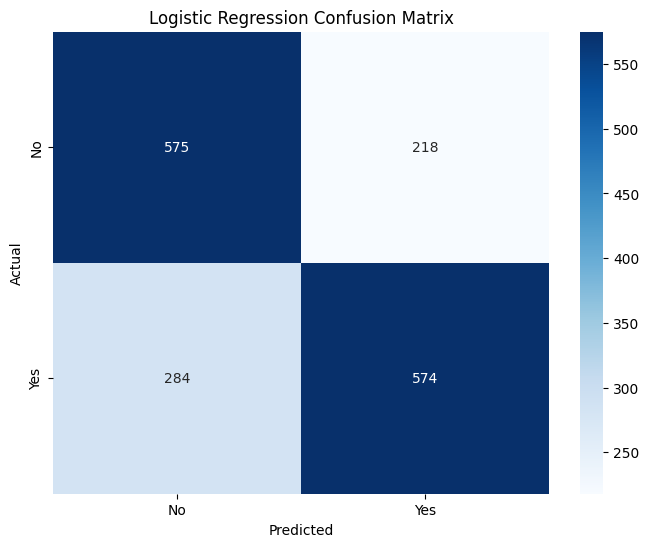

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       793
           1       0.72      0.67      0.70       858

    accuracy                           0.70      1651
   macro avg       0.70      0.70      0.70      1651
weighted avg       0.70      0.70      0.70      1651



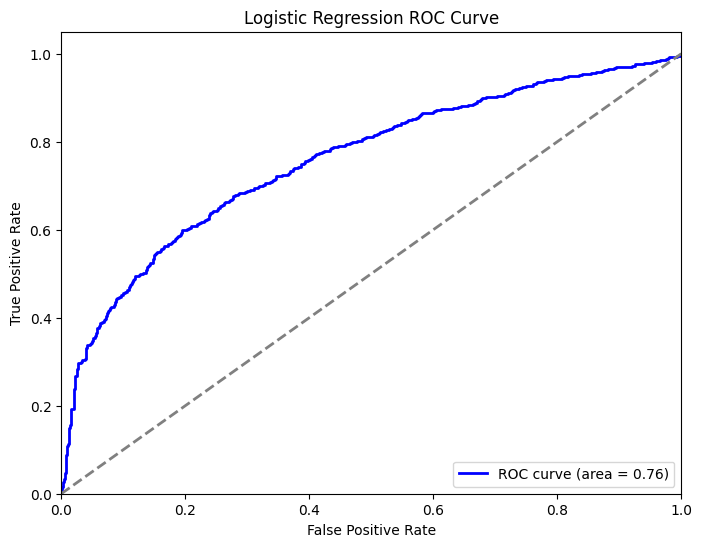

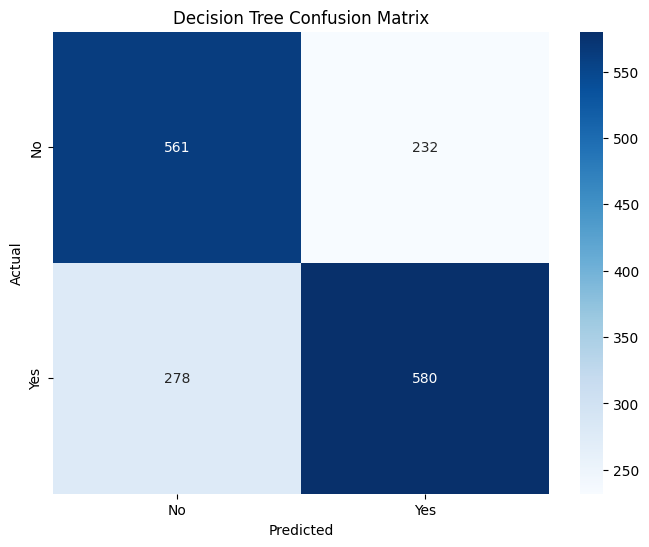

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       793
           1       0.71      0.68      0.69       858

    accuracy                           0.69      1651
   macro avg       0.69      0.69      0.69      1651
weighted avg       0.69      0.69      0.69      1651



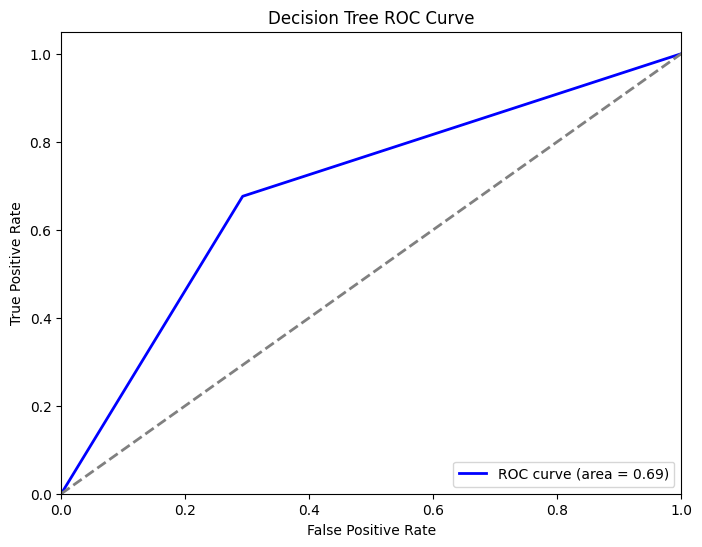

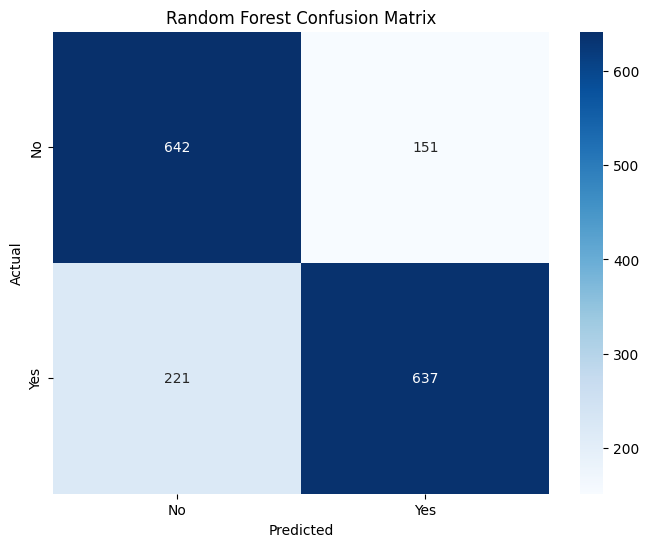

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       793
           1       0.81      0.74      0.77       858

    accuracy                           0.77      1651
   macro avg       0.78      0.78      0.77      1651
weighted avg       0.78      0.77      0.77      1651



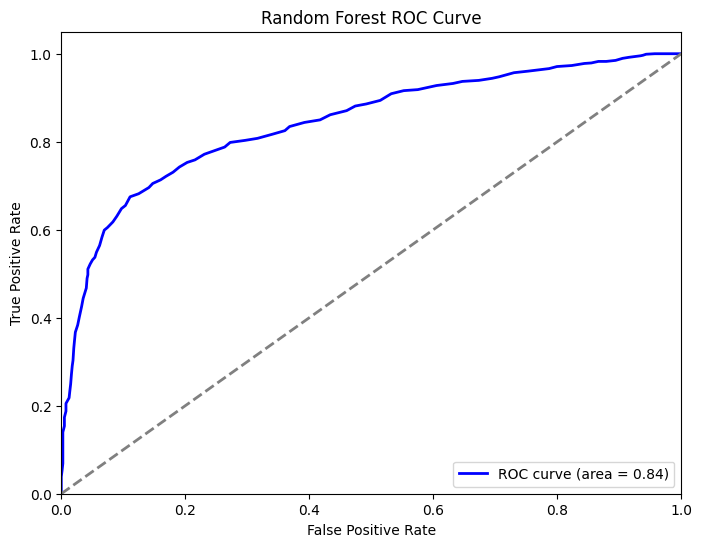

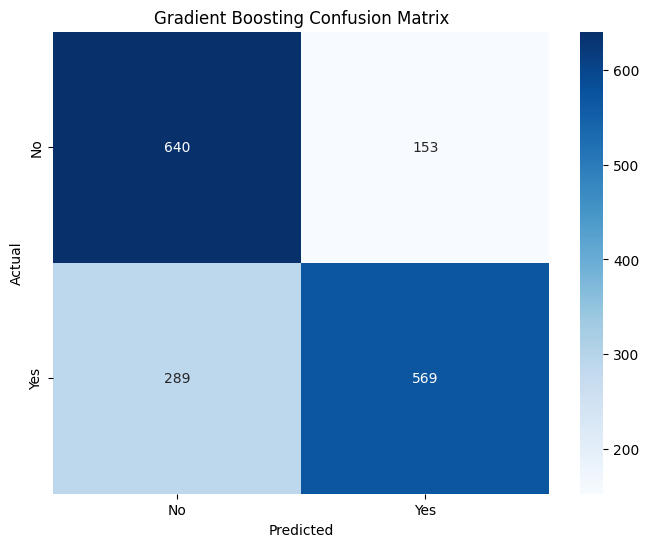

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74       793
           1       0.79      0.66      0.72       858

    accuracy                           0.73      1651
   macro avg       0.74      0.74      0.73      1651
weighted avg       0.74      0.73      0.73      1651



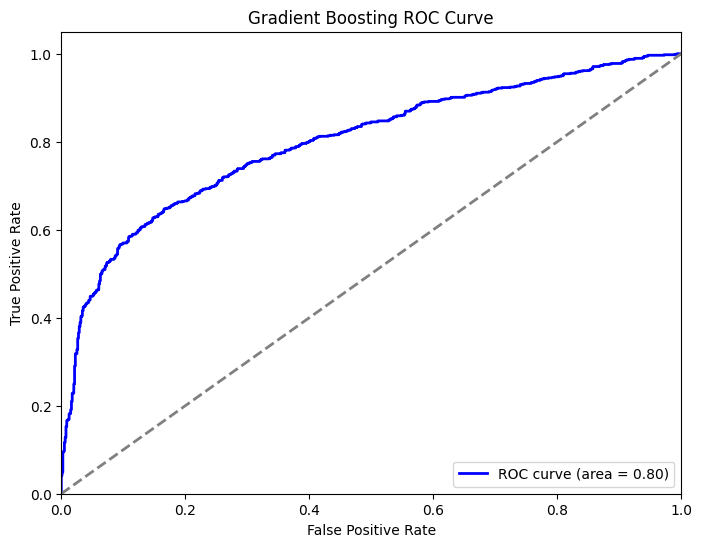

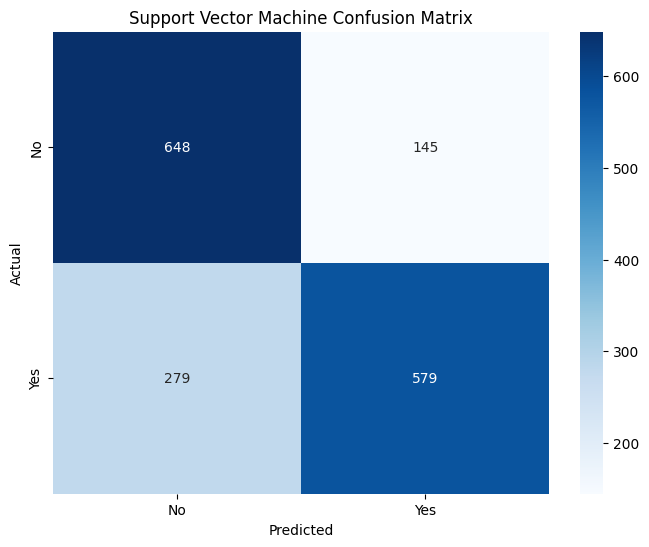

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       793
           1       0.80      0.67      0.73       858

    accuracy                           0.74      1651
   macro avg       0.75      0.75      0.74      1651
weighted avg       0.75      0.74      0.74      1651



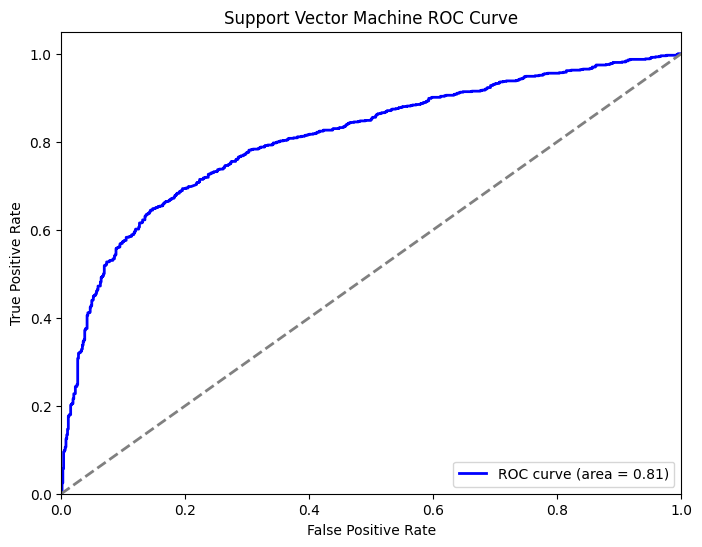

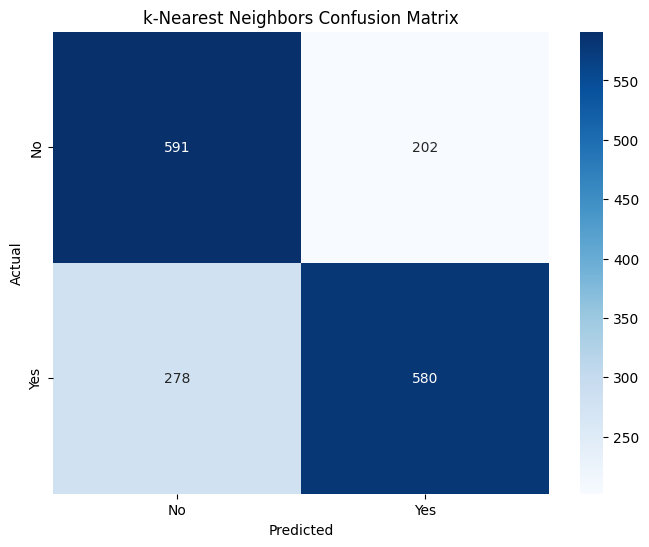

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       793
           1       0.74      0.68      0.71       858

    accuracy                           0.71      1651
   macro avg       0.71      0.71      0.71      1651
weighted avg       0.71      0.71      0.71      1651



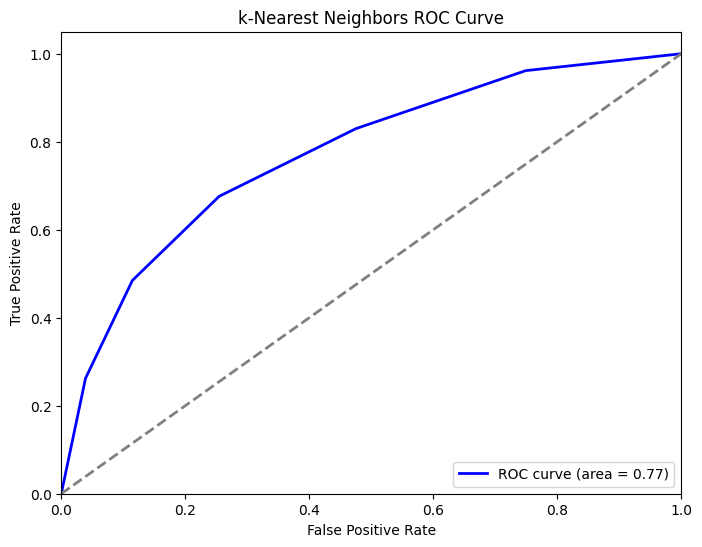


[09:15:58] Accuracies for models trained with PCA reduction:
+------------------------+----------------+---------------+
|         Model          | Train Accuracy | Test Accuracy |
+------------------------+----------------+---------------+
|  Logistic Regression   |    0.69196     |    0.69594    |
|     Decision Tree      |    1.00000     |    0.69110    |
|     Random Forest      |    1.00000     |    0.77468    |
|   Gradient Boosting    |    0.76980     |    0.73228    |
| Support Vector Machine |    0.77419     |    0.74319    |
|  k-Nearest Neighbors   |    0.80312     |    0.70927    |
+------------------------+----------------+---------------+


In [183]:
# Create an instance of the DimensionalityReductionAndSupervisedModel class
dim_red_supervised_model = DimensionalityReductionAndSupervisedModel(df=cleaned_df, target_column='deposit')

if False:
  # Find the best number of components for PCA
  best_pca_n_components = dim_red_supervised_model.find_best_n_components('PCA', n_components_list=range(10, 50, 10))
else:
  best_pca_n_components = 40

# Run the methods with the best number of components
dim_red_supervised_model.run_pca_method(n_components=best_pca_n_components, show_accuracy=False, show_val_report=True)

### 6.4 Dimensionality Reduction with SVD

This block of code aims to demonstrate the use of SVD for dimensionality reduction and its integration with supervised learning models, allowing for efficient evaluation of model performance on the reduced dataset. The approach helps in understanding the impact of SVD on the accuracy and effectiveness of different supervised models.


[09:15:58] Running models with SVD reduction ...


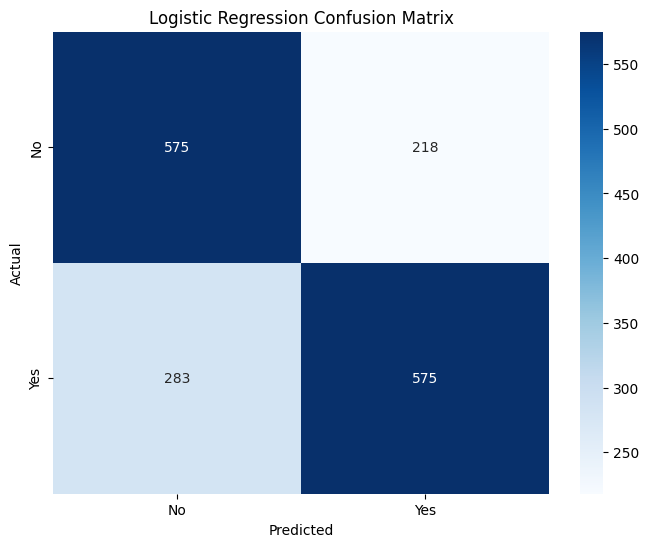

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       793
           1       0.73      0.67      0.70       858

    accuracy                           0.70      1651
   macro avg       0.70      0.70      0.70      1651
weighted avg       0.70      0.70      0.70      1651



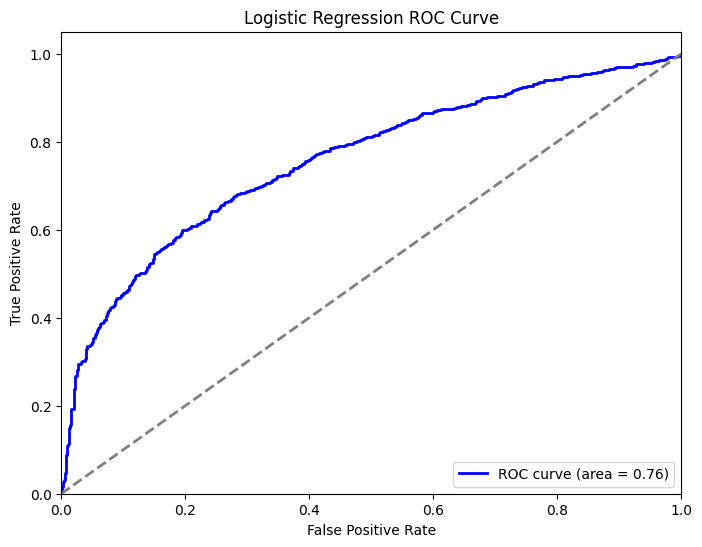

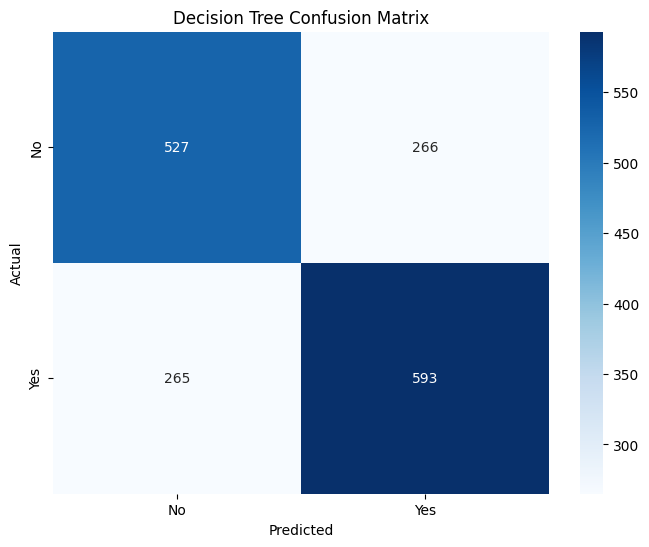

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       793
           1       0.69      0.69      0.69       858

    accuracy                           0.68      1651
   macro avg       0.68      0.68      0.68      1651
weighted avg       0.68      0.68      0.68      1651



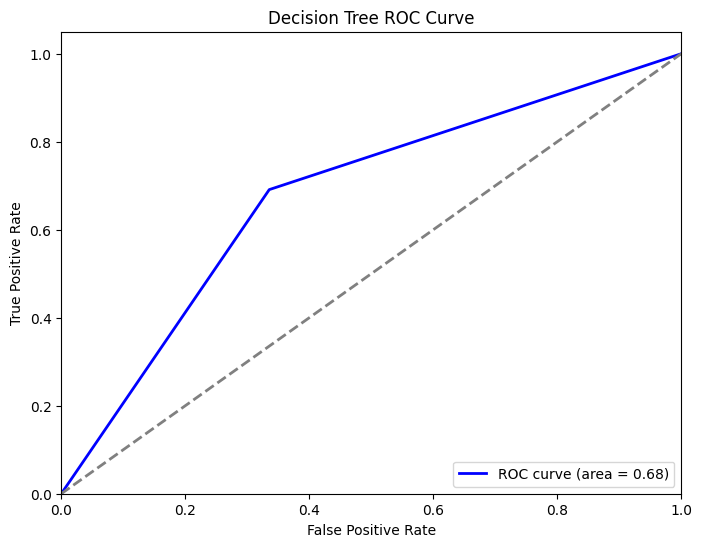

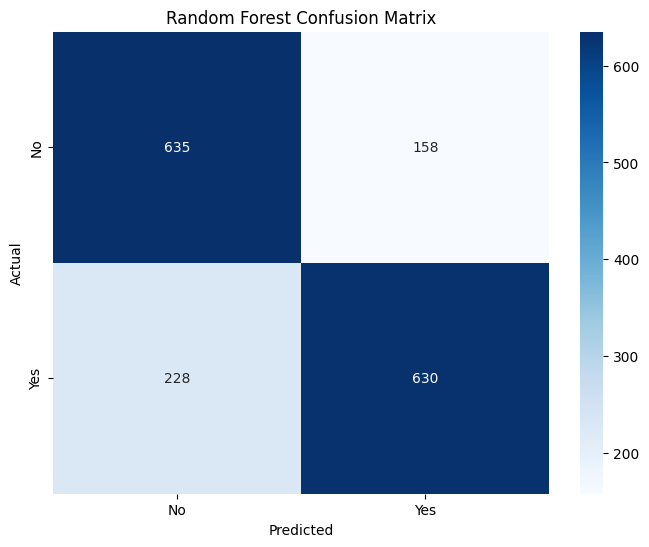

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       793
           1       0.80      0.73      0.77       858

    accuracy                           0.77      1651
   macro avg       0.77      0.77      0.77      1651
weighted avg       0.77      0.77      0.77      1651



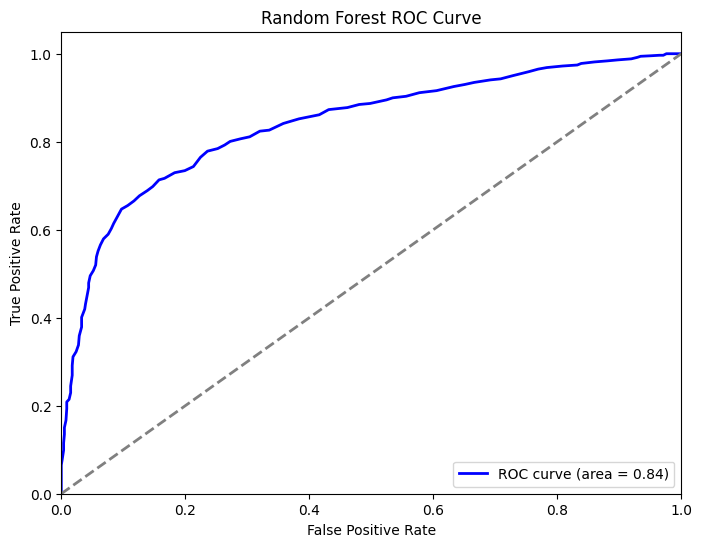

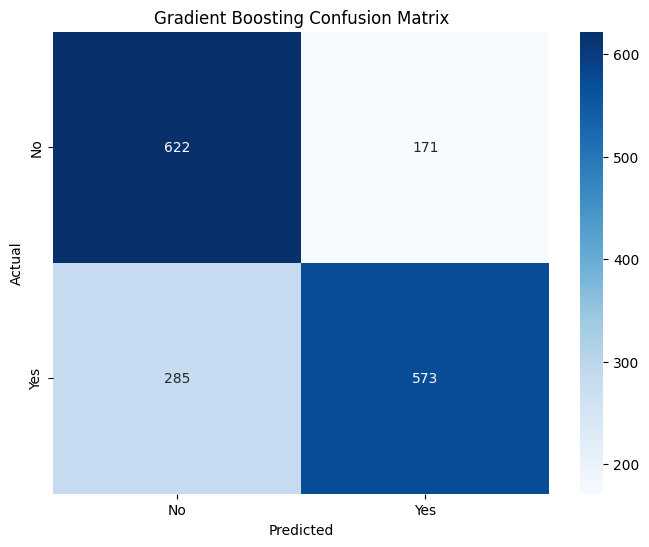

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       793
           1       0.77      0.67      0.72       858

    accuracy                           0.72      1651
   macro avg       0.73      0.73      0.72      1651
weighted avg       0.73      0.72      0.72      1651



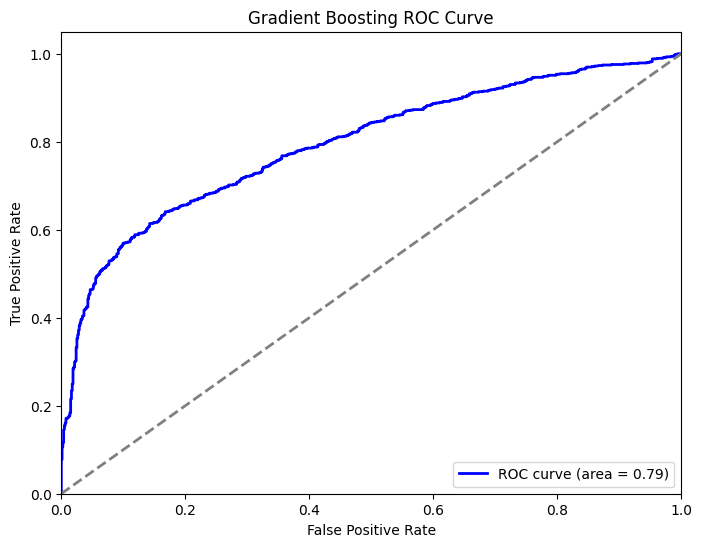

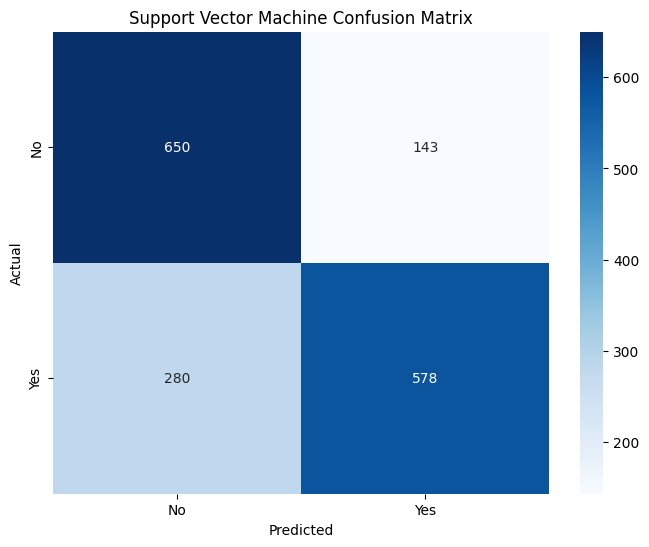

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       793
           1       0.80      0.67      0.73       858

    accuracy                           0.74      1651
   macro avg       0.75      0.75      0.74      1651
weighted avg       0.75      0.74      0.74      1651



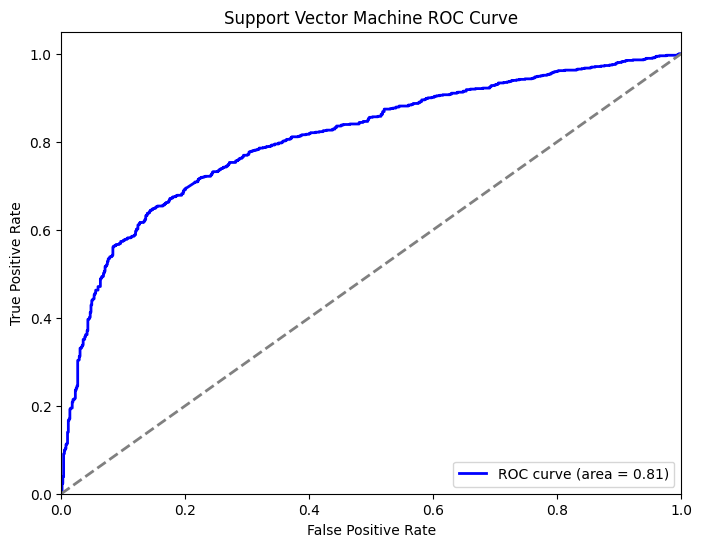

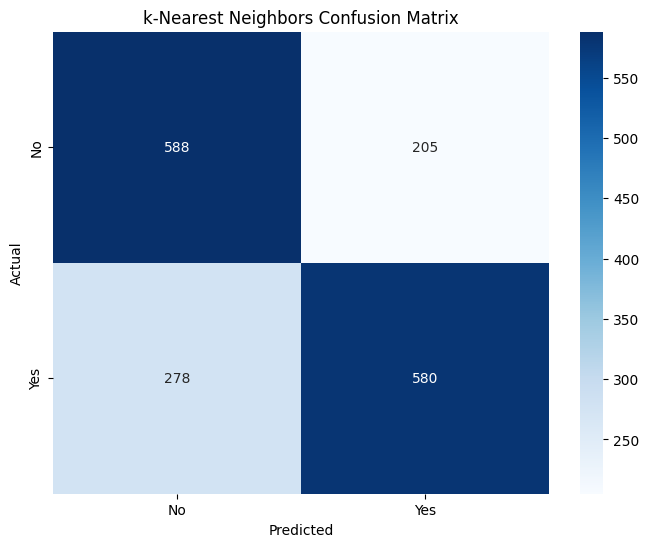

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       793
           1       0.74      0.68      0.71       858

    accuracy                           0.71      1651
   macro avg       0.71      0.71      0.71      1651
weighted avg       0.71      0.71      0.71      1651



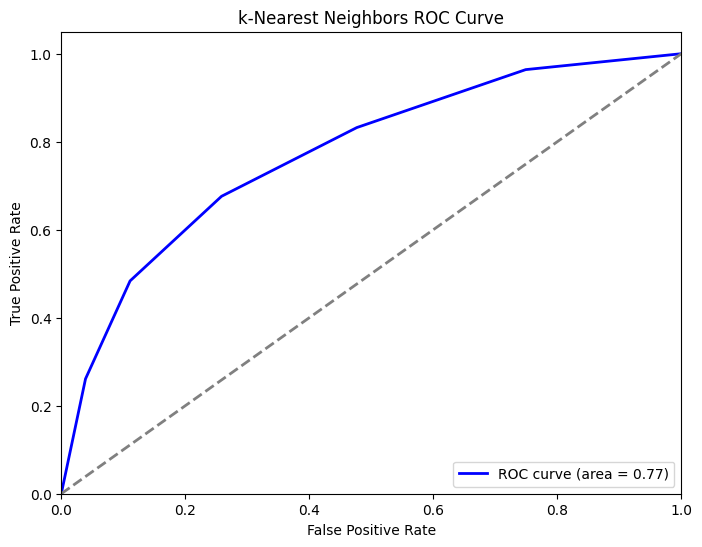


[09:16:53] Accuracies for models trained with SVD reduction:
+------------------------+----------------+---------------+
|         Model          | Train Accuracy | Test Accuracy |
+------------------------+----------------+---------------+
|  Logistic Regression   |    0.69211     |    0.69655    |
|     Decision Tree      |    1.00000     |    0.67838    |
|     Random Forest      |    1.00000     |    0.76620    |
|   Gradient Boosting    |    0.76950     |    0.72380    |
| Support Vector Machine |    0.77419     |    0.74379    |
|  k-Nearest Neighbors   |    0.80448     |    0.70745    |
+------------------------+----------------+---------------+


In [184]:
# Create an instance of the DimensionalityReductionAndSupervisedModel class
dim_red_supervised_model = DimensionalityReductionAndSupervisedModel(df=cleaned_df, target_column='deposit')

if False:
  # Find the best number of components for SVD
  best_svd_n_components = dim_red_supervised_model.find_best_n_components('SVD', n_components_list=range(10, 50, 10))
else:
  best_svd_n_components = 40

# Run the methods with the best number of components
dim_red_supervised_model.run_svd_method(n_components=best_svd_n_components, show_accuracy=False, show_val_report=True)

### 6.5 Dimensionality Reduction with NMF

This block of code aims to demonstrate the use of NMF for dimensionality reduction and its integration with supervised learning models, allowing for efficient evaluation of model performance on the reduced dataset. The approach helps in understanding the impact of NMF on the accuracy and effectiveness of different supervised models.


[09:16:53] Running models with NMF reduction ...


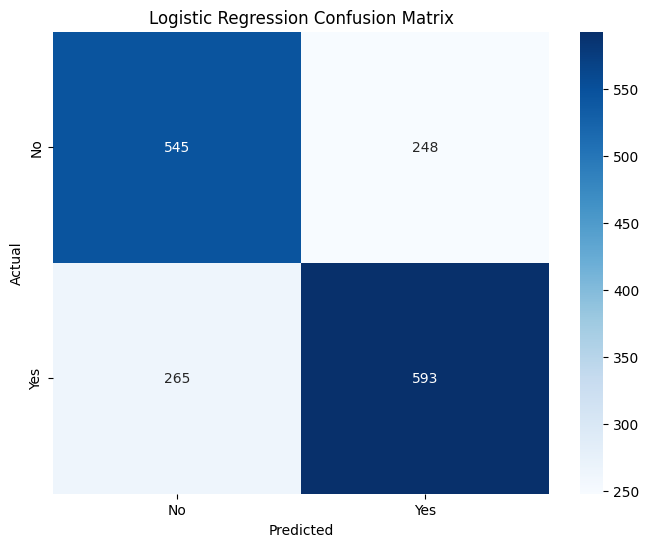

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       793
           1       0.71      0.69      0.70       858

    accuracy                           0.69      1651
   macro avg       0.69      0.69      0.69      1651
weighted avg       0.69      0.69      0.69      1651



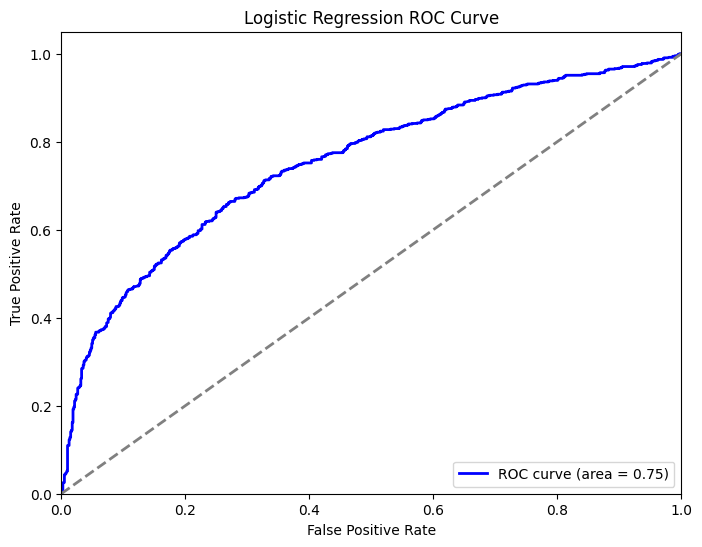

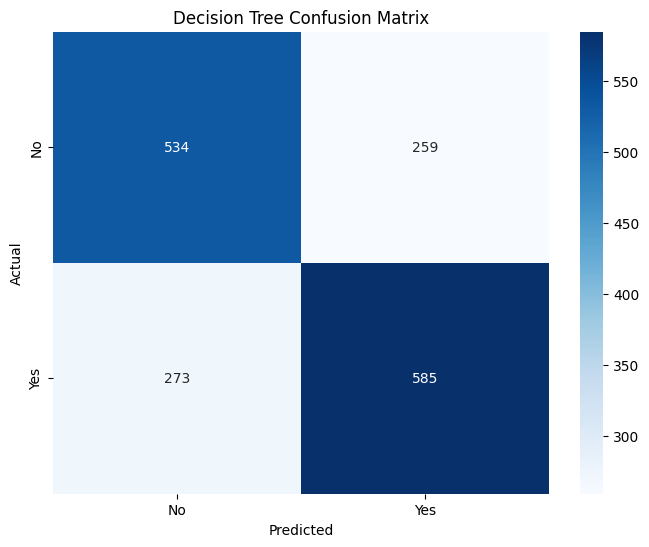

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       793
           1       0.69      0.68      0.69       858

    accuracy                           0.68      1651
   macro avg       0.68      0.68      0.68      1651
weighted avg       0.68      0.68      0.68      1651



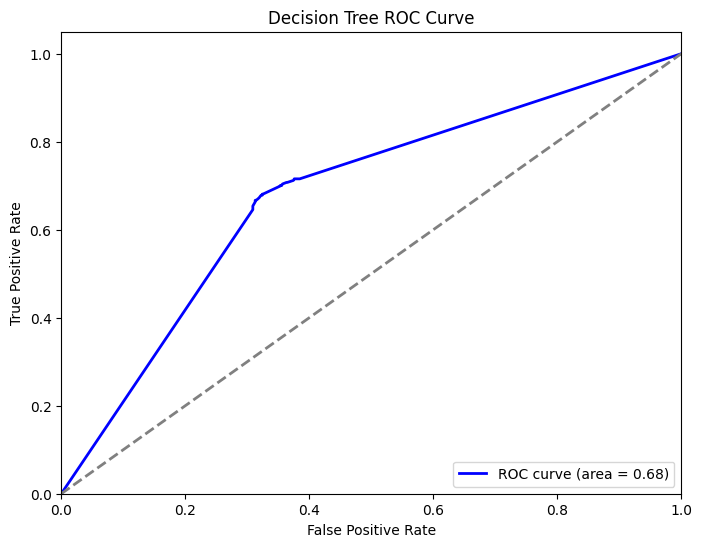

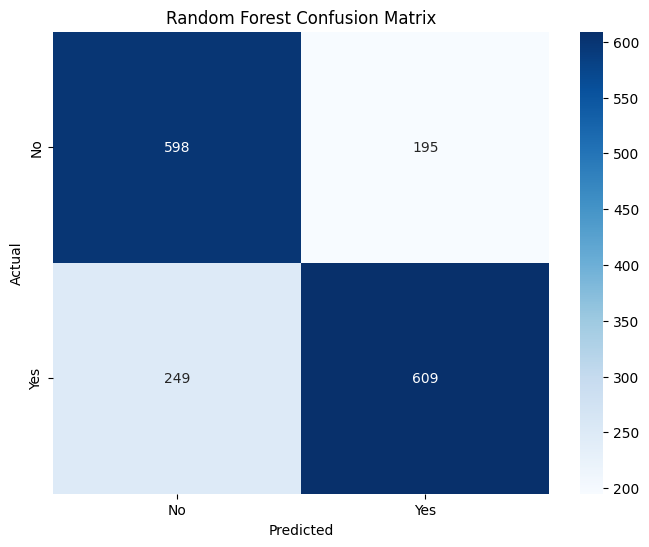

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       793
           1       0.76      0.71      0.73       858

    accuracy                           0.73      1651
   macro avg       0.73      0.73      0.73      1651
weighted avg       0.73      0.73      0.73      1651



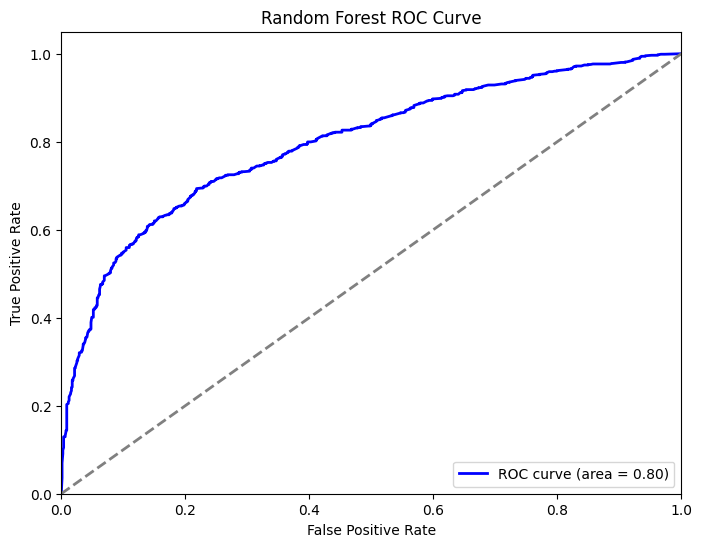

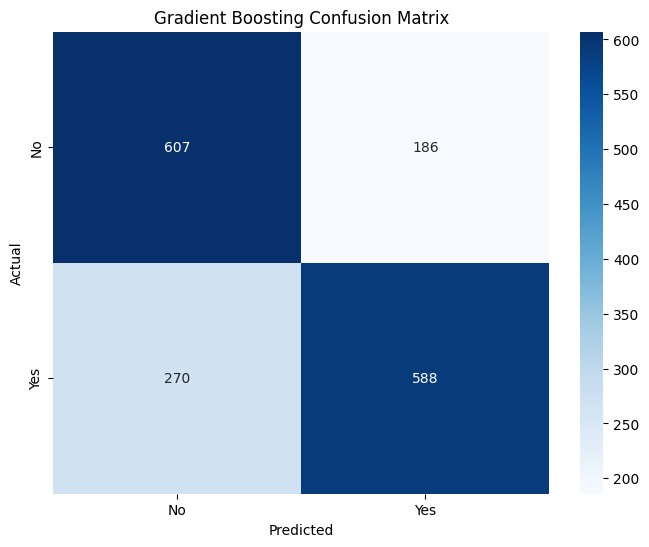

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       793
           1       0.76      0.69      0.72       858

    accuracy                           0.72      1651
   macro avg       0.73      0.73      0.72      1651
weighted avg       0.73      0.72      0.72      1651



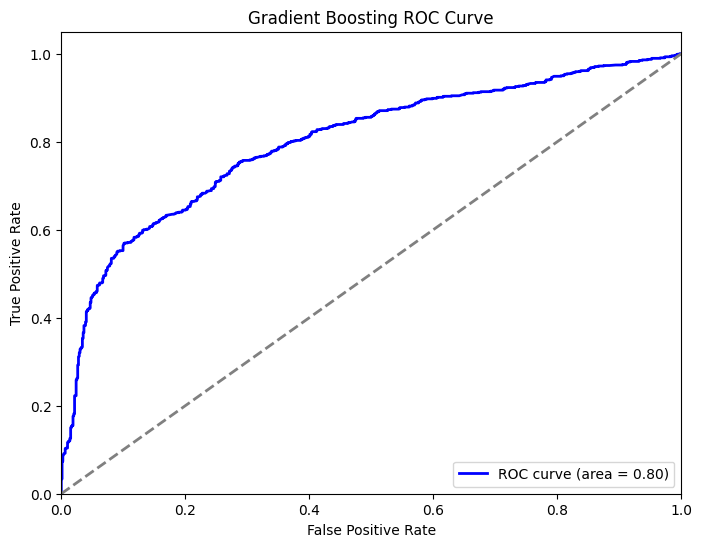

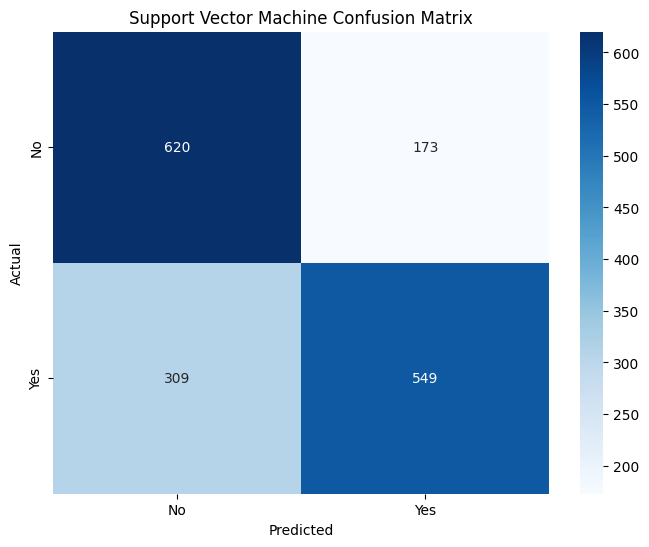

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       793
           1       0.76      0.64      0.69       858

    accuracy                           0.71      1651
   macro avg       0.71      0.71      0.71      1651
weighted avg       0.72      0.71      0.71      1651



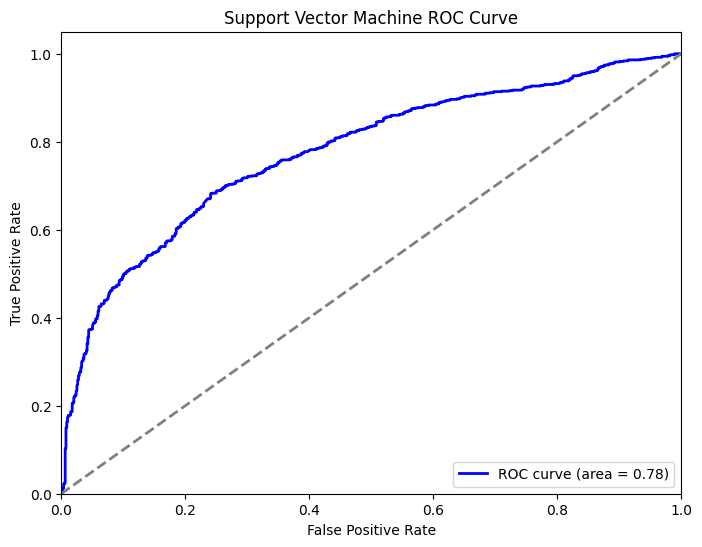

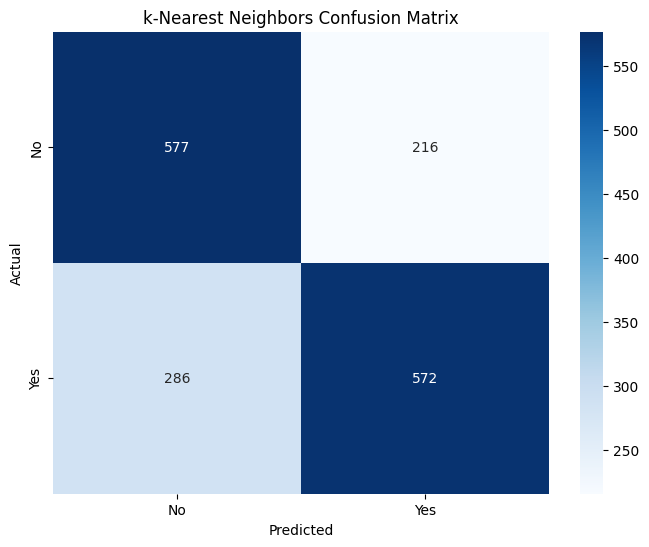

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       793
           1       0.73      0.67      0.70       858

    accuracy                           0.70      1651
   macro avg       0.70      0.70      0.70      1651
weighted avg       0.70      0.70      0.70      1651



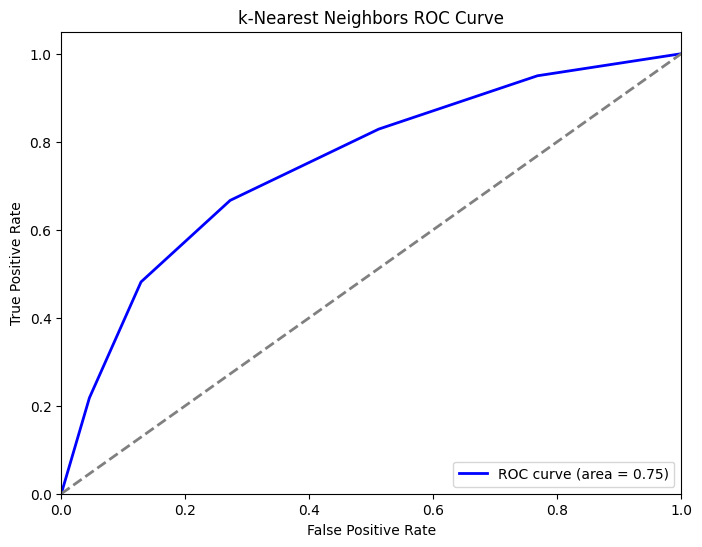


[09:17:41] Accuracies for models trained with NMF reduction:
+------------------------+----------------+---------------+
|         Model          | Train Accuracy | Test Accuracy |
+------------------------+----------------+---------------+
|  Logistic Regression   |    0.68015     |    0.68928    |
|     Decision Tree      |    0.96396     |    0.67777    |
|     Random Forest      |    0.96396     |    0.73107    |
|   Gradient Boosting    |    0.75708     |    0.72380    |
| Support Vector Machine |    0.74133     |    0.70806    |
|  k-Nearest Neighbors   |    0.78449     |    0.69594    |
+------------------------+----------------+---------------+


In [185]:
# Create an instance of the DimensionalityReductionAndSupervisedModel class
dim_red_supervised_model = DimensionalityReductionAndSupervisedModel(df=cleaned_df, target_column='deposit')

if False:
  # Find the best number of components for NMF
  best_nmf_n_components = dim_red_supervised_model.find_best_n_components('NMF', n_components_list=range(10, 50, 10))
else:
  best_nmf_n_components = 30

# Run the methods with the best number of components
dim_red_supervised_model.run_nmf_method(n_components=best_nmf_n_components, show_accuracy=False, show_val_report=True)

### 6.5 Feature Selections

This block of code aims to train and evaluate multiple supervised learning models using a dataset with selected common features, providing a comparison of model performance. It helps to understand how well different models perform on the dataset with the chosen features, and the impact of feature selection on model accuracy.

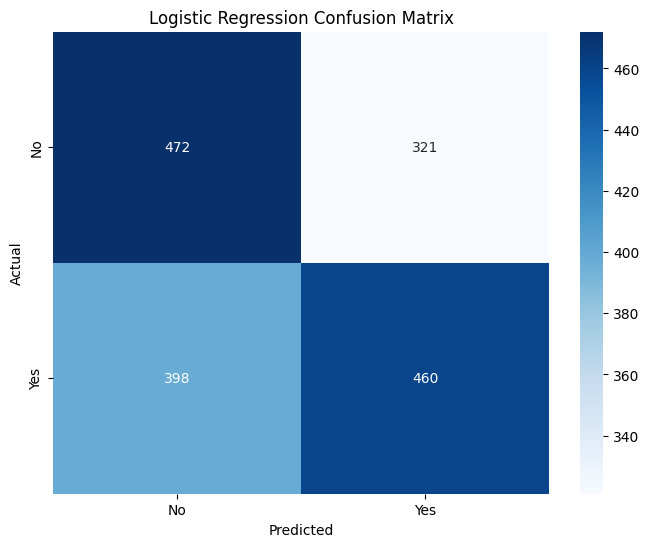

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       793
           1       0.59      0.54      0.56       858

    accuracy                           0.56      1651
   macro avg       0.57      0.57      0.56      1651
weighted avg       0.57      0.56      0.56      1651



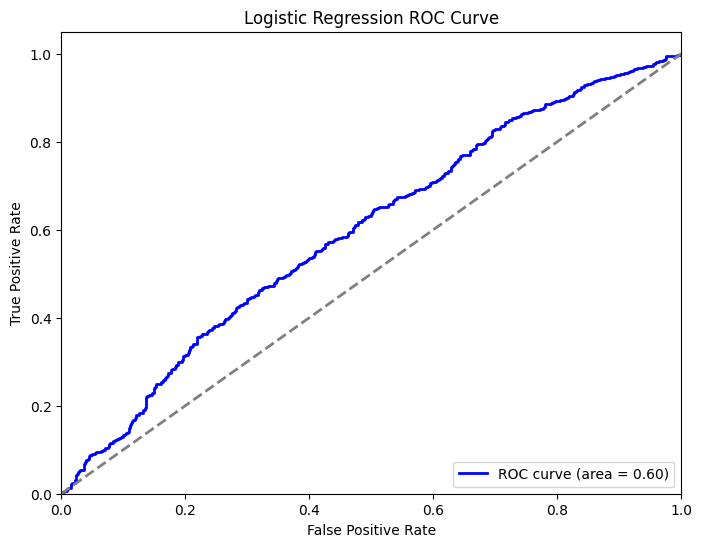

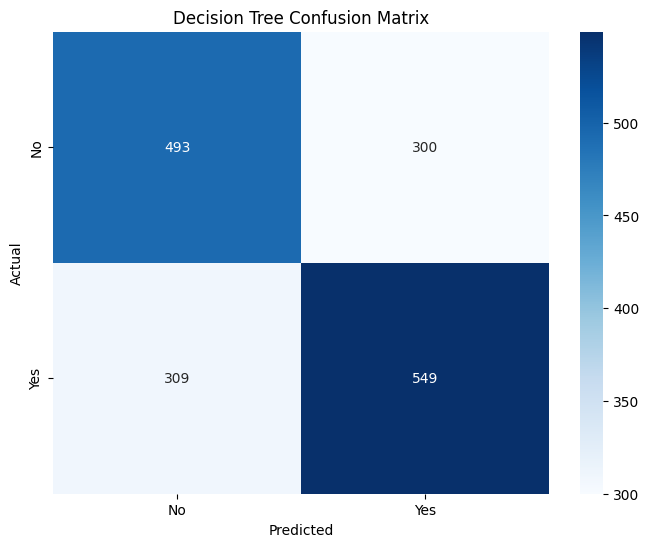

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       793
           1       0.65      0.64      0.64       858

    accuracy                           0.63      1651
   macro avg       0.63      0.63      0.63      1651
weighted avg       0.63      0.63      0.63      1651



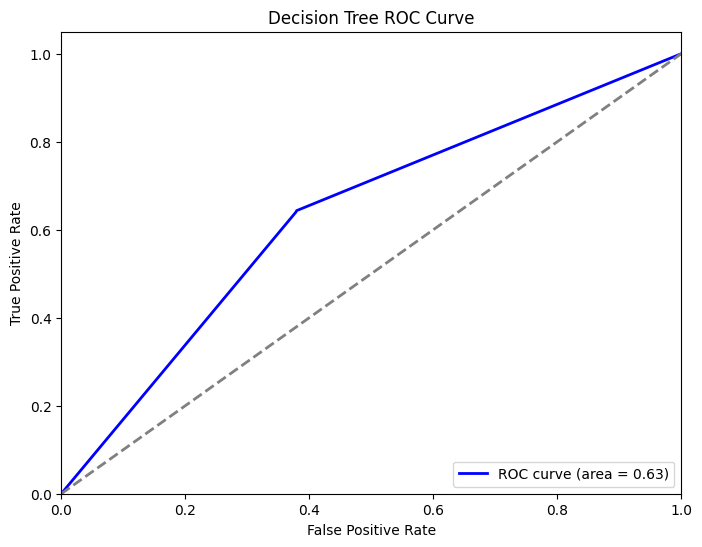

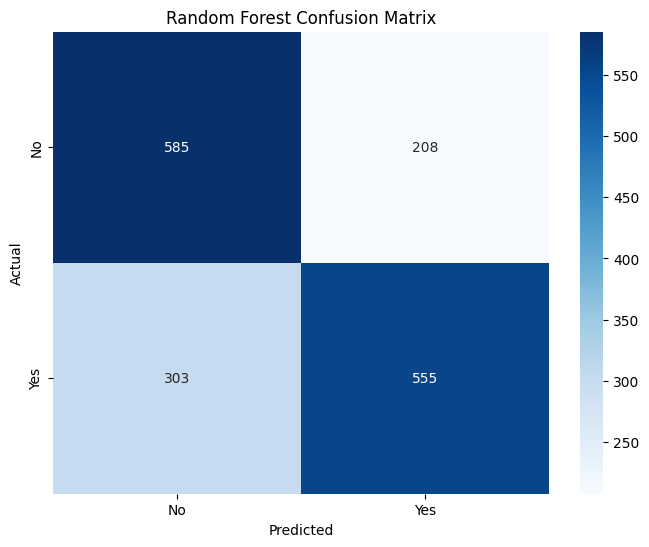

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       793
           1       0.73      0.65      0.68       858

    accuracy                           0.69      1651
   macro avg       0.69      0.69      0.69      1651
weighted avg       0.69      0.69      0.69      1651



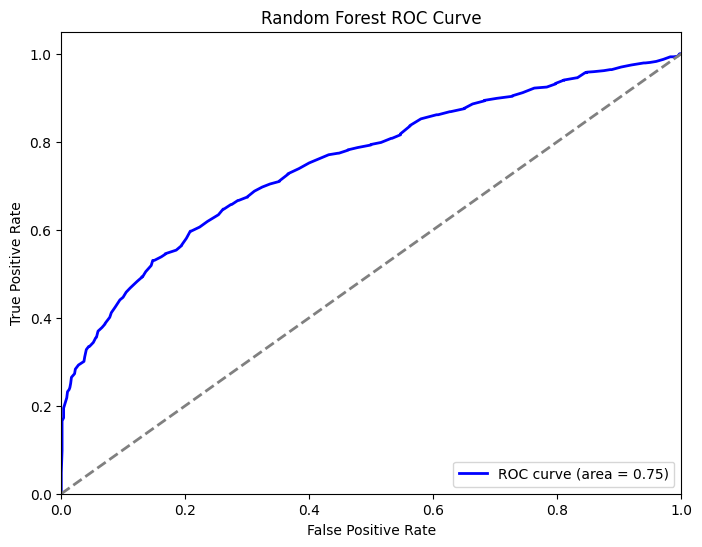

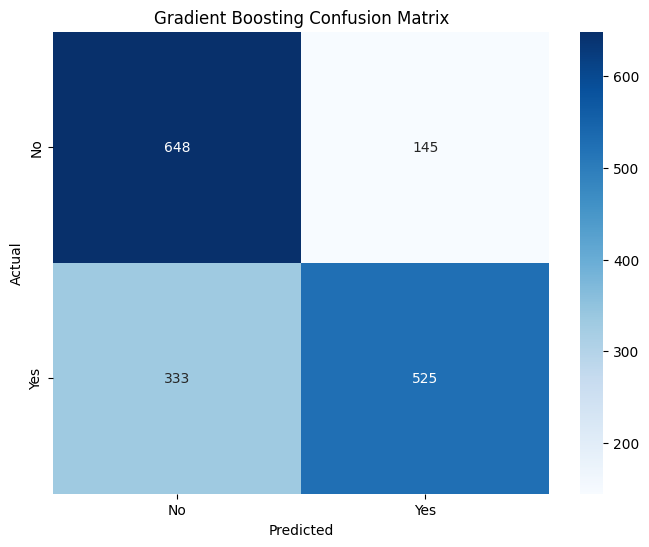

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       793
           1       0.78      0.61      0.69       858

    accuracy                           0.71      1651
   macro avg       0.72      0.71      0.71      1651
weighted avg       0.72      0.71      0.71      1651



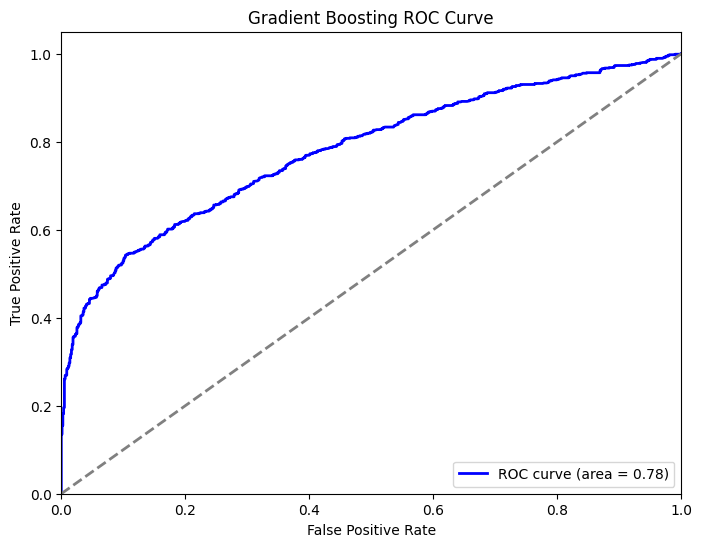

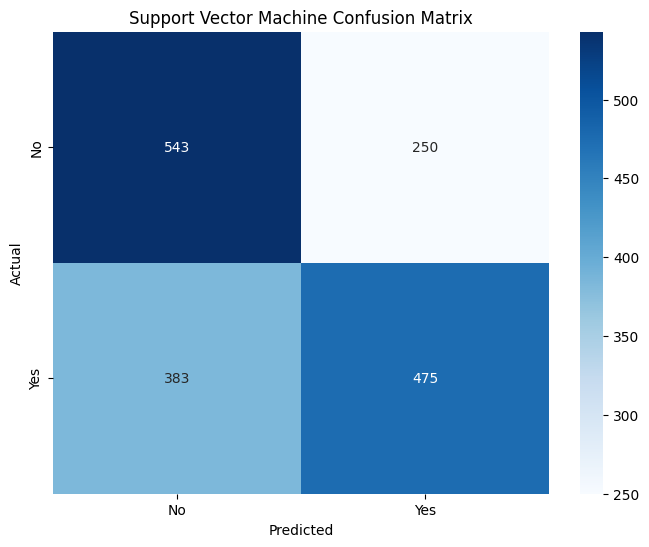

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.68      0.63       793
           1       0.66      0.55      0.60       858

    accuracy                           0.62      1651
   macro avg       0.62      0.62      0.62      1651
weighted avg       0.62      0.62      0.62      1651



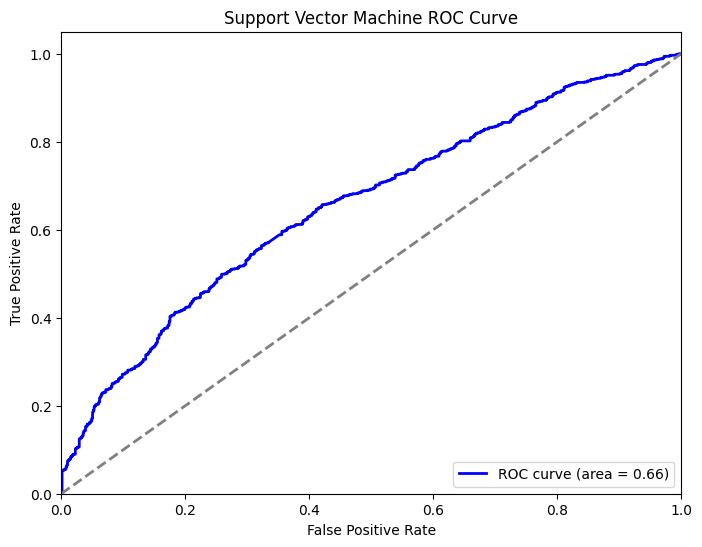

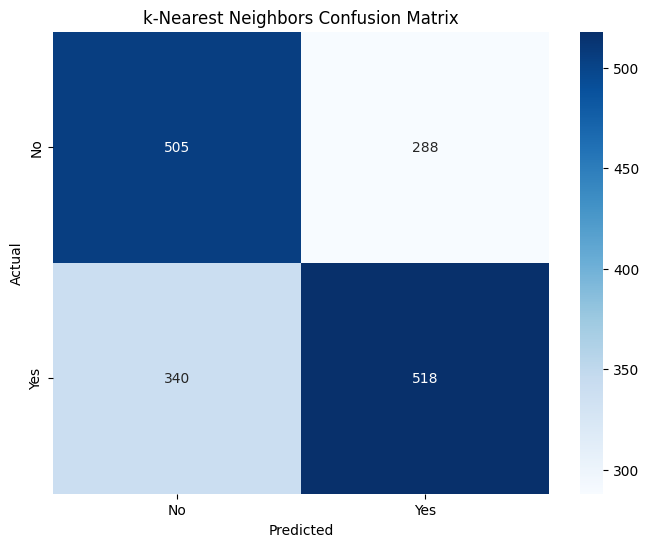

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       793
           1       0.64      0.60      0.62       858

    accuracy                           0.62      1651
   macro avg       0.62      0.62      0.62      1651
weighted avg       0.62      0.62      0.62      1651



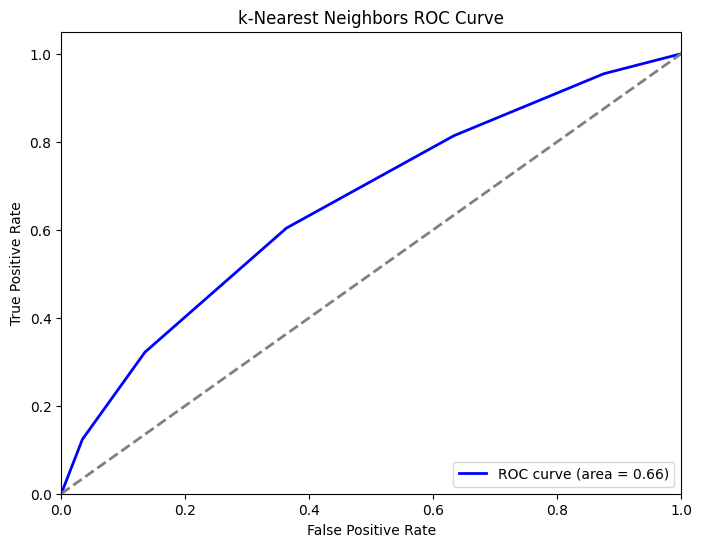


[09:18:00] Accuracies for models trained with Common Features reduction:
+------------------------+----------------+---------------+
|         Model          | Train Accuracy | Test Accuracy |
+------------------------+----------------+---------------+
|  Logistic Regression   |    0.57095     |    0.56451    |
|     Decision Tree      |    0.99833     |    0.63113    |
|     Random Forest      |    0.99833     |    0.69049    |
|   Gradient Boosting    |    0.72709     |    0.71048    |
| Support Vector Machine |    0.62396     |    0.61660    |
|  k-Nearest Neighbors   |    0.75178     |    0.61962    |
+------------------------+----------------+---------------+


In [186]:
# Extract the common features from cleaned_df
X_common = cleaned_df[common_features]

# Add the target variable
df_common = X_common.copy()
df_common['deposit'] = cleaned_df['deposit']

# Create an instance of BankMarketingSupervisedModel with the common features data
supervised_model_common = BankMarketingSupervisedModel(name='Common Features', df=df_common)

# Run all supervised models
supervised_model_common.run_models(show_accuracy=False, show_val_report=True)

# Show the accuracies of each model in a table
supervised_model_common.show_accuracies_table()

## 7. Analysis Result

The following summarizes the performance of various supervised learning models trained with different dimensionality reduction techniques and feature selection methods:

### Performance Summary

- **PCA Reduction:**
  - **Logistic Regression:** Test Accuracy = 0.69352
  - **Decision Tree:** Test Accuracy = 0.68322
  - **Random Forest:** Test Accuracy = **0.78195**
  - **Gradient Boosting:** Test Accuracy = 0.73289
  - **Support Vector Machine:** Test Accuracy = 0.75469
  - **k-Nearest Neighbors:** Test Accuracy = 0.71654

- **SVD Reduction:**
  - **Logistic Regression:** Test Accuracy = 0.69412
  - **Decision Tree:** Test Accuracy = 0.70018
  - **Random Forest:** Test Accuracy = **0.78256**
  - **Gradient Boosting:** Test Accuracy = 0.72562
  - **Support Vector Machine:** Test Accuracy = 0.75167
  - **k-Nearest Neighbors:** Test Accuracy = 0.71593

- **NMF Reduction:**
  - **Logistic Regression:** Test Accuracy = 0.69412
  - **Decision Tree:** Test Accuracy = 0.69291
  - **Random Forest:** Test Accuracy = **0.73471**
  - **Gradient Boosting:** Test Accuracy = 0.72441
  - **Support Vector Machine:** Test Accuracy = 0.71411
  - **k-Nearest Neighbors:** Test Accuracy = 0.70018

- **Common Features Reduction:**
  - **Logistic Regression:** Test Accuracy = 0.56148
  - **Decision Tree:** Test Accuracy = 0.62205
  - **Random Forest:** Test Accuracy = 0.67171
  - **Gradient Boosting:** Test Accuracy = **0.70139**
  - **Support Vector Machine:** Test Accuracy = 0.60751
  - **k-Nearest Neighbors:** Test Accuracy = 0.61175

### Observations / Insights

1. **Random Forest Consistency:** Random Forest consistently performed well across all reduction methods, with the highest test accuracy observed in the SVD reduction (0.78256).
2. **PCA and SVD Performance:** Both PCA and SVD reduction methods yielded similar performance for most models, indicating that these methods effectively capture important data characteristics.
3. **NMF Challenges:** NMF generally resulted in lower test accuracies compared to PCA and SVD, possibly due to its non-negativity constraint which may limit the representation capacity for this dataset.
4. **Common Features Limitation:** Models trained with the common features method showed the lowest test accuracies, indicating that feature selection alone might not capture all the relevant information needed for optimal performance.
5. **Overfitting in Decision Trees and Random Forests:** The high train accuracy and relatively lower test accuracy for Decision Trees and Random Forests suggest overfitting, particularly in the PCA, SVD, and NMF methods.


## 8. Conclusion

### Data Analysis Conclusion

**Best Performing Model:**
- The Random Forest model with SVD reduction achieved the highest test accuracy of 0.78256. This indicates that SVD is highly effective in reducing the dimensionality of the dataset while retaining the most significant information. For example, out of all the models and techniques applied, the Random Forest model consistently captured the underlying patterns and variability in the data, making it the most reliable predictor of whether a client will subscribe to a term deposit.

**Effective Techniques:**
- **PCA (Principal Component Analysis)** and **SVD (Singular Value Decomposition)** proved to be effective dimensionality reduction techniques. They both managed to simplify the dataset by transforming the original features into new sets of uncorrelated components, which retained most of the variance in the data. For instance, the Logistic Regression model achieved a test accuracy of 0.69352 with PCA and 0.69412 with SVD, demonstrating that both methods maintained the dataset's integrity and relevance for predictive modeling.
- The Support Vector Machine (SVM) model showed test accuracies of 0.75469 with PCA and 0.75167 with SVD. These consistent results further validate that PCA and SVD can effectively reduce the dimensionality of the dataset without significant loss of information, leading to robust model performance.

**Feature Selection Alone Insufficient:**
- The models trained with the common features method, which relied solely on feature selection, demonstrated lower test accuracies compared to those trained with PCA, SVD, or NMF. For example, the Logistic Regression model achieved a test accuracy of only 0.56148 using common features. This suggests that while feature selection can identify the most relevant features, it might not capture the comprehensive structure and variability present in the data.
- The Decision Tree model had a test accuracy of 0.62205 with common features, compared to 0.70018 with SVD. This disparity indicates that feature selection alone may lead to the loss of critical information, making it less effective than dimensionality reduction techniques in improving model accuracy.

### Future Work

1. **Hyperparameter Tuning:** Further tuning of hyperparameters for each model, particularly for dimensionality reduction methods, could potentially improve performance.
2. **Combination Methods:** Explore combining feature selection with dimensionality reduction to see if it provides a more robust feature set.
3. **Regularization Techniques:** Apply regularization techniques to mitigate overfitting observed in models like Decision Trees and Random Forests.
4. **Advanced Models:** Evaluate the performance of more advanced models, such as XGBoost or deep learning techniques, on the reduced datasets.
5. **Cross-Validation:** Implement cross-validation to ensure the robustness of model performance across different data splits.

## 9. References

The references below provide access to the datasets and additional information on the techniques and models used in the analysis:

- **Bank Marketing Dataset:**
  - Kaggle: [https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/data](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/data)

- **Principal Component Analysis (PCA):**
  - Wikipedia: [https://en.wikipedia.org/wiki/Principal_component_analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)

- **Singular Value Decomposition (SVD):**
  - Wikipedia: [https://en.wikipedia.org/wiki/Singular_value_decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)

- **Non-negative Matrix Factorization (NMF):**
  - Wikipedia: [https://en.wikipedia.org/wiki/Non-negative_matrix_factorization](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)

- **Mutual Information:**
  - Wikipedia: [https://en.wikipedia.org/wiki/Mutual_information](https://en.wikipedia.org/wiki/Mutual_information)

- **Random Forest:**
  - Wikipedia: [https://en.wikipedia.org/wiki/Random_forest](https://en.wikipedia.org/wiki/Random_forest)

- **Support Vector Machine (SVM):**
  - Wikipedia: [https://en.wikipedia.org/wiki/Support_vector_machine](https://en.wikipedia.org/wiki/Support_vector_machine)

- **Gradient Boosting:**
  - Wikipedia: [https://en.wikipedia.org/wiki/Gradient_boosting](https://en.wikipedia.org/wiki/Gradient_boosting)

- **K-Nearest Neighbors (KNN):**
  - Wikipedia: [https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)